In [458]:
import numpy as np # For numerical computing
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For data visualization
from sklearn.model_selection import train_test_split # For data train test split
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Evaluation metrics

In [459]:
data = pd.read_csv("data.csv")
data_descritpion = pd.read_csv("documentation.csv")

In [460]:
# Getting some rows from the data
data.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [461]:
# Getting the description of data
data_descritpion

,Column name,Original column name,Details
0,sample_id,Sample ID,Unique string identifying each subject
1,patient_cohort,Patient's Cohort,"Cohort 1, previously used samples; Cohort 2, ..."
2,sample_origin,Sample Origin,"BPTB: Barts Pancreas Tissue Bank, London, UK; ..."
3,age,Age,Age in years
4,sex,Sex,"M = male, F = female"
5,diagnosis,"Diagnosis (1=Control, 2=Benign, 3=PDAC)","1 = control (no pancreatic disease), 2 = benig..."
6,stage,Stage,"For those with pancratic cancer, what stage wa..."
7,benign_sample_diagnosis,Benign Samples Diagnosis,"For those with a benign, non-cancerous diagnos..."
8,plasma_CA19_9,Plasma CA19-9 U/ml,Blood plasma levels of CA 19–9 monoclonal anti...
9,creatinine,Creatinine mg/ml,Urinary biomarker of kidney function


In [462]:
data.columns

Index(['sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex',
       'diagnosis', 'stage', 'benign_sample_diagnosis', 'plasma_CA19_9',
       'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A'],
      dtype='object')

In [463]:
data.describe()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,350.000000,590.000000,590.000000,590.000000,590.000000,306.000000
mean,59.079661,2.027119,654.002944,0.855383,3.063530,111.774090,597.868722,735.281222
std,13.109520,0.804873,2430.317642,0.639028,3.438796,196.267110,1010.477245,1477.247724
min,26.000000,1.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,50.000000,1.000000,8.000000,0.373230,0.167179,10.757216,43.961000,80.692000
50%,60.000000,2.000000,26.500000,0.723840,1.649862,34.303353,259.873974,208.538500
75%,69.000000,3.000000,294.000000,1.139482,5.205037,122.741013,742.736000,649.000000
max,89.000000,3.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


In [464]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

In [465]:
data.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [466]:
# Ratio of missing values
round(data.isna().sum()/len(data) * 100, 2)

sample_id                   0.00
patient_cohort              0.00
sample_origin               0.00
age                         0.00
sex                         0.00
diagnosis                   0.00
stage                      66.27
benign_sample_diagnosis    64.75
plasma_CA19_9              40.68
creatinine                  0.00
LYVE1                       0.00
REG1B                       0.00
TFF1                        0.00
REG1A                      48.14
dtype: float64

In [467]:
print(data_descritpion.loc[ data_descritpion['Column name'] == 'REG1A'].to_string())

   Column name Original column name                                                                                                                                                            Details
13       REG1A          REG1A ng/ml  Urinary levels of a protein that may be associated with pancreas regeneration. Only assessed in 306 patients (one goal of the study was to assess REG1B vs REG1A)


In [468]:
data.REG1A.value_counts()

REG1A
0.000        7
137.000      2
64.821       2
1262.000     1
494.080      1
            ..
50.007       1
75.094       1
519.132      1
431.409      1
13200.000    1
Name: count, Length: 298, dtype: int64

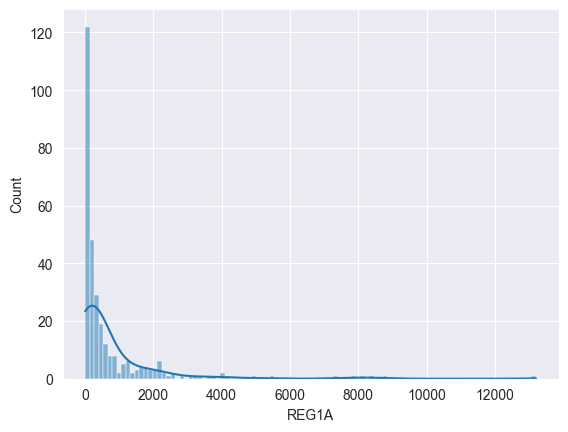

In [469]:
sns.histplot(data.REG1A, kde = True, bins = 100)
plt.show()

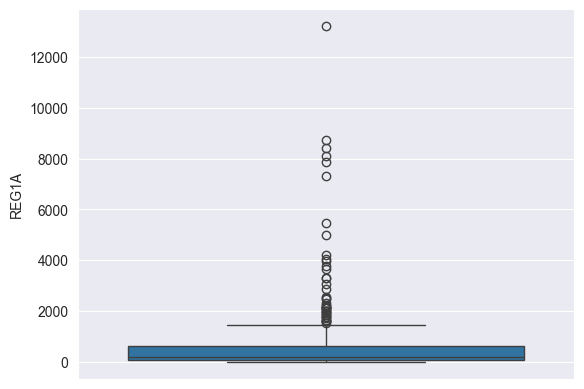

In [470]:
sns.boxplot(data.REG1A)
plt.show()

In [471]:
np.mean(data.REG1A), np.nanmedian(data.REG1A)

(735.2812222222221, 208.5385)

In [472]:
data.REG1A.value_counts()

REG1A
0.000        7
137.000      2
64.821       2
1262.000     1
494.080      1
            ..
50.007       1
75.094       1
519.132      1
431.409      1
13200.000    1
Name: count, Length: 298, dtype: int64

In [473]:
data.loc[:, 'REG1A'] = data['REG1A'].fillna(value=np.nanmedian(data['REG1A']))

In [474]:
data['REG1A']

0       1262.0000
1        228.4070
2        208.5385
3        208.5385
4        208.5385
          ...    
585      208.5385
586      208.5385
587      208.5385
588      208.5385
589    13200.0000
Name: REG1A, Length: 590, dtype: float64

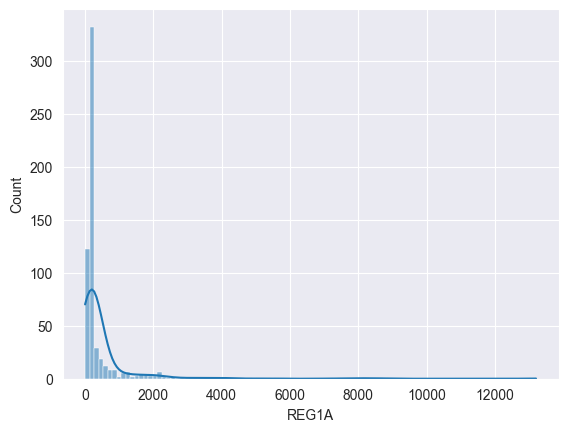

In [475]:
sns.histplot(data.REG1A, kde = True, bins = 100)
plt.show()

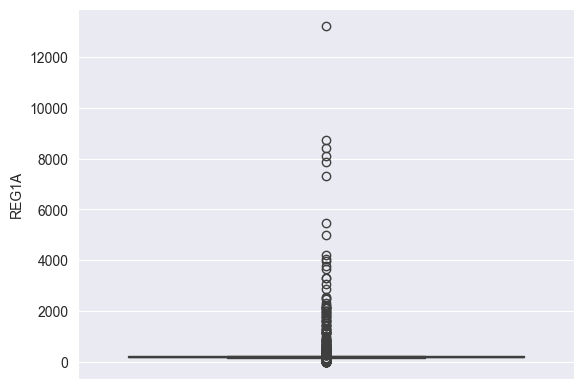

In [476]:
sns.boxplot(data.REG1A)
plt.show()

In [477]:
print(data_descritpion.loc[ data_descritpion['Column name'] == 'plasma_CA19_9'].to_string())

     Column name Original column name                                                                                                                                                                                                                                                                         Details
8  plasma_CA19_9   Plasma CA19-9 U/ml  Blood plasma levels of CA 19–9 monoclonal antibody that is often elevated in patients with pancreatic cancer. Only assessed in 350 patients (one goal of the study was to compare various CA 19-9 cutpoints from a blood sample to the model developed using urinary samples).


In [478]:
data.plasma_CA19_9.value_counts()

plasma_CA19_9
11.0      8
9.0       8
7.0       6
10.0      5
4.0       5
         ..
263.0     1
1913.0    1
72.0      1
32.0      1
1488.0    1
Name: count, Length: 266, dtype: int64

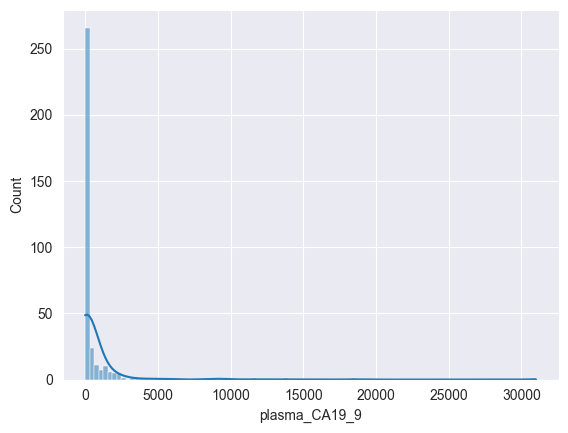

In [479]:
sns.histplot(data.plasma_CA19_9, kde = True, bins = 100)
plt.show()

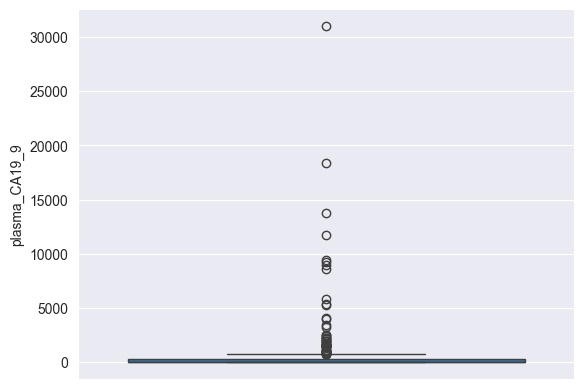

In [480]:
sns.boxplot(data.plasma_CA19_9)
plt.show()

In [481]:
np.mean(data.plasma_CA19_9), np.nanmedian(data.plasma_CA19_9)

(654.0029437763428, 26.5)

In [482]:
data.plasma_CA19_9.value_counts()

plasma_CA19_9
11.0      8
9.0       8
7.0       6
10.0      5
4.0       5
         ..
263.0     1
1913.0    1
72.0      1
32.0      1
1488.0    1
Name: count, Length: 266, dtype: int64

In [483]:
data.loc[:, 'plasma_CA19_9'] = data['plasma_CA19_9'].fillna(value=np.nanmedian(data['plasma_CA19_9']))

In [484]:
data['plasma_CA19_9']

0        11.7
1        26.5
2         7.0
3         8.0
4         9.0
        ...  
585      26.5
586      26.5
587      26.5
588      26.5
589    1488.0
Name: plasma_CA19_9, Length: 590, dtype: float64

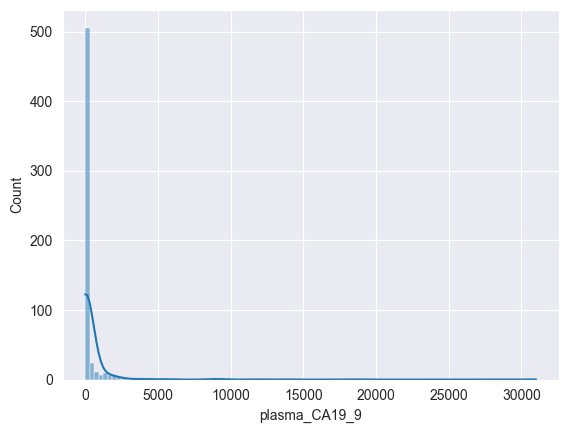

In [485]:
sns.histplot(data.plasma_CA19_9, kde = True, bins = 100)
plt.show()

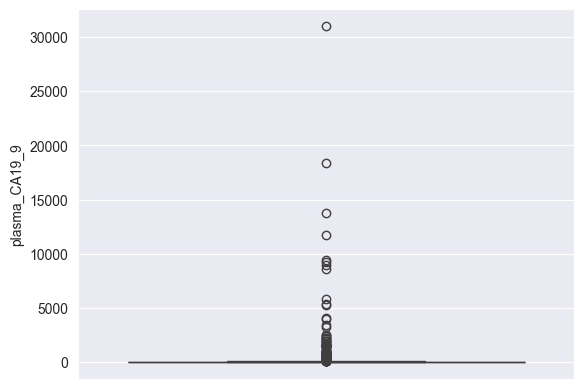

In [486]:
sns.boxplot(data.plasma_CA19_9)
plt.show()

In [487]:
data.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9                0
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                        0
dtype: int64

In [488]:
print(data_descritpion.loc[ data_descritpion['Column name'] == 'benign_sample_diagnosis'].to_string())

               Column name      Original column name                                                                    Details
7  benign_sample_diagnosis  Benign Samples Diagnosis  For those with a benign, non-cancerous diagnosis, what was the diagnosis?


In [489]:
data['benign_sample_diagnosis'].value_counts()

benign_sample_diagnosis
Pancreatitis                                                    41
Pancreatitis (Chronic)                                          35
Gallstones                                                      21
Pancreatitis (Alcohol-Chronic)                                  11
Cholecystitis                                                    9
Serous cystadenoma - NOS                                         7
Choledocholiathiasis                                             6
Abdominal Pain                                                   6
Pancreatitis (Idiopathic)                                        4
Pancreatitis (Alcohol-Chronic-Pseuodcyst)                        4
Pancreatitis (Gallstone)                                         4
Pancreatitis (Pseudocyst)                                        4
Premalignant lesions-Mucinous cystadenoma-NOS                    3
Pancreatitis (Autoimmune)                                        3
Serous microcystic adenoma            

In [490]:
data.loc[ (data.benign_sample_diagnosis.isna() == False) ]

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
183,S271,Cohort2,BPTB,32,F,2,NaN,Abdominal Pain,12.0,1.16493,5.417692,21.135,445.72500,208.5385
184,S299,Cohort2,BPTB,59,F,2,NaN,Abdominal Pain,26.5,0.41847,0.526248,24.111,4.09000,208.5385
185,S308,Cohort2,BPTB,65,F,2,NaN,Abdominal Pain,26.5,0.36192,2.343091,12.957,0.02823,208.5385
186,S314,Cohort2,BPTB,39,F,2,NaN,Abdominal Pain,26.5,0.89349,0.736352,21.550,105.94300,208.5385
187,S315,Cohort2,BPTB,65,F,2,NaN,Abdominal Pain,13.0,0.37323,0.228904,13.977,7.36700,208.5385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,S360,Cohort2,BPTB,49,F,2,NaN,Serous cystadenoma - NOS,20.0,0.71253,0.632433,22.602,494.58800,208.5385
387,S259,Cohort2,BPTB,53,F,2,NaN,Serous microcystic adenoma,21.0,0.45240,0.963804,21.320,78.29200,208.5385
388,S300,Cohort2,BPTB,74,F,2,NaN,Serous microcystic adenoma,13.0,0.12441,0.000498,1.295,42.66700,208.5385
389,S302,Cohort2,BPTB,69,M,2,NaN,Serous microcystic adenoma,26.5,0.13572,0.000543,19.427,2.57800,208.5385


In [491]:
data.loc[ (data.benign_sample_diagnosis.isna() == False), 'diagnosis'].value_counts()

diagnosis
2    208
Name: count, dtype: int64

In [492]:
print(data_descritpion.loc[ data_descritpion['Column name'] == 'stage'].to_string())

  Column name Original column name                                                                                Details
6       stage                Stage  For those with pancratic cancer, what stage was it? One of IA, IB, IIA, IIIB, III, IV


In [493]:
data.stage.value_counts()

stage
III    76
IIB    68
IV     21
IB     12
IIA    11
II      7
IA      3
I       1
Name: count, dtype: int64

In [494]:
data.loc[ (data.stage.isna() == False), 'diagnosis'].value_counts()

diagnosis
3    199
Name: count, dtype: int64

In [495]:
# We consider dropping these columns, since we are not going to use them!
data.drop(columns = ['benign_sample_diagnosis','stage'], inplace = True)

In [496]:
data.isna().sum()

sample_id         0
patient_cohort    0
sample_origin     0
age               0
sex               0
diagnosis         0
plasma_CA19_9     0
creatinine        0
LYVE1             0
REG1B             0
TFF1              0
REG1A             0
dtype: int64

In [497]:
# Dropping sample_id column, since we are not going to use for the prediction task
data.sample_id

0        S1
1       S10
2      S100
3      S101
4      S102
       ... 
585    S549
586    S558
587    S560
588    S583
589    S590
Name: sample_id, Length: 590, dtype: object

In [498]:
data.drop(columns = ['sample_id'], inplace=True)

In [499]:
data.columns

Index(['patient_cohort', 'sample_origin', 'age', 'sex', 'diagnosis',
       'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A'],
      dtype='object')

In [500]:
print(data_descritpion.loc[ data_descritpion['Column name'] == 'patient_cohort'].to_string())

      Column name Original column name                                                            Details
1  patient_cohort     Patient's Cohort  Cohort 1,  previously used samples; Cohort 2, newly added samples


In [501]:
data['patient_cohort'].value_counts()

patient_cohort
Cohort1    332
Cohort2    258
Name: count, dtype: int64

<Axes: ylabel='patient_cohort'>

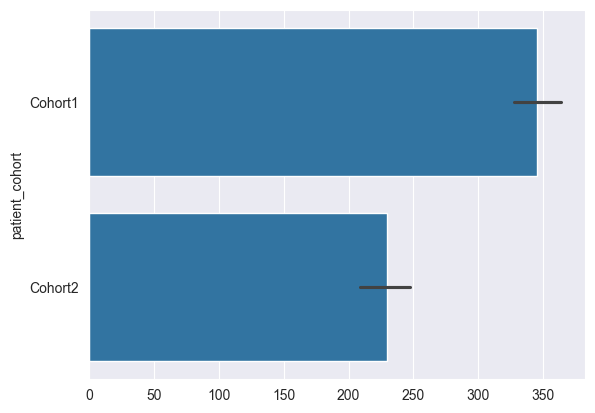

In [502]:
sns.barplot(data.patient_cohort)

In [503]:
print(data_descritpion.loc[ data_descritpion['Column name'] == 'sample_origin'].to_string())

     Column name Original column name                                                                                                                                                                       Details
2  sample_origin        Sample Origin  BPTB: Barts Pancreas Tissue Bank, London, UK; ESP: Spanish National Cancer Research Centre, Madrid, Spain; LIV: Liverpool University, UK; UCL: University College London, UK


In [504]:
data['sample_origin'].value_counts()

sample_origin
BPTB    409
LIV     132
ESP      29
UCL      20
Name: count, dtype: int64

<Axes: ylabel='sample_origin'>

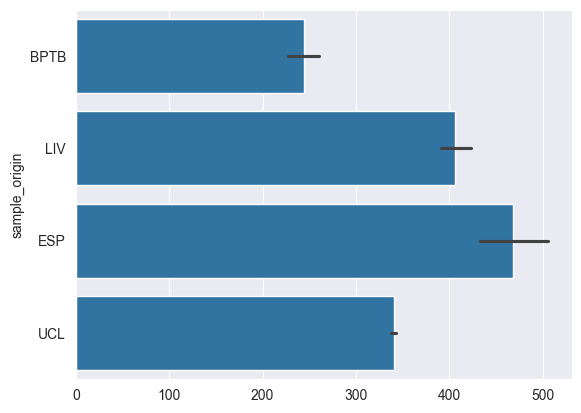

In [505]:
sns.barplot(data.sample_origin)

In [506]:
# I do not think "sample_origin" colum would be usefull for predicting the output! Therefore, I am dropping it :)
data.drop(columns = ['sample_origin'], inplace=True)

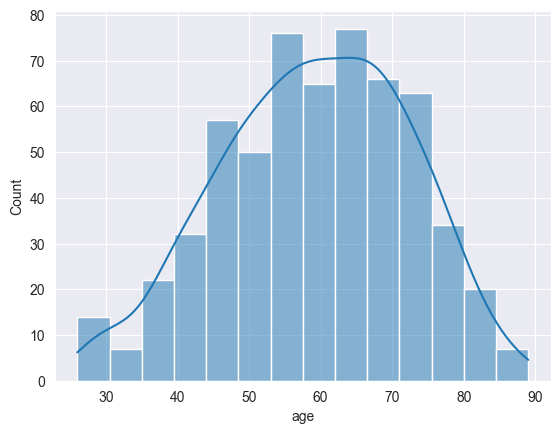

In [507]:
sns.histplot(data.age, kde = True)
plt.show()

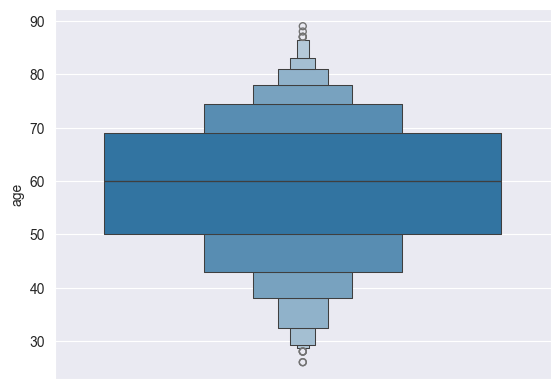

In [508]:
sns.boxenplot(data.age)
plt.show()

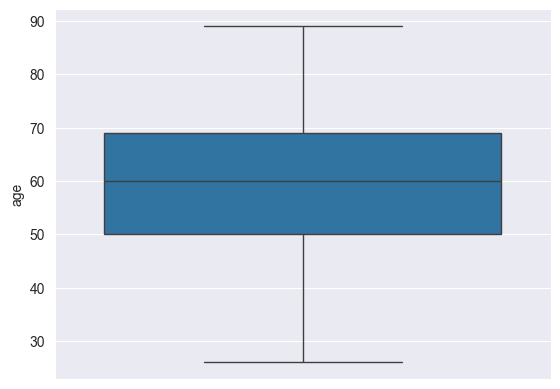

In [509]:
sns.boxplot(data.age)
plt.show()

In [510]:
np.mean(data.age), np.median(data.age)

(59.07966101694915, 60.0)

In [511]:
data.age.value_counts()

age
68    21
58    20
66    18
67    18
62    17
      ..
86     1
33     1
34     1
89     1
85     1
Name: count, Length: 63, dtype: int64

In [512]:
data.sex.value_counts()

sex
F    299
M    291
Name: count, dtype: int64

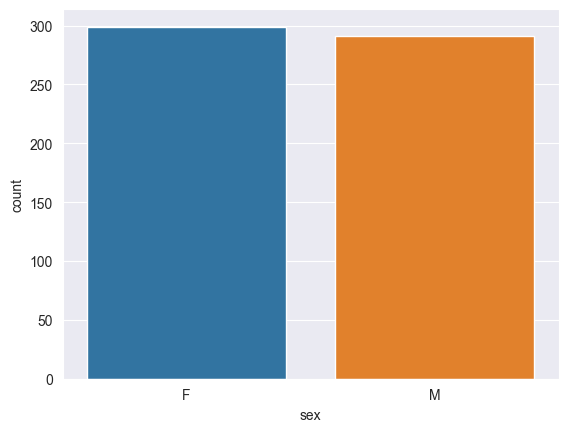

In [513]:
sns.countplot(data, x = 'sex', hue='sex')
plt.show()

In [514]:
data.diagnosis.value_counts()

diagnosis
2    208
3    199
1    183
Name: count, dtype: int64

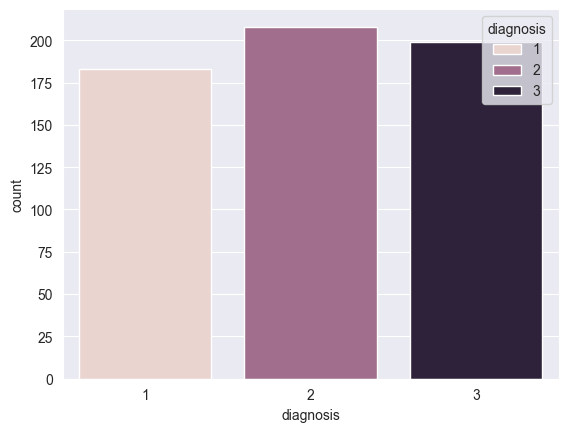

In [515]:
sns.countplot(data, x = data.diagnosis, hue = data.diagnosis)
plt.show()

In [516]:
data.plasma_CA19_9

0        11.7
1        26.5
2         7.0
3         8.0
4         9.0
        ...  
585      26.5
586      26.5
587      26.5
588      26.5
589    1488.0
Name: plasma_CA19_9, Length: 590, dtype: float64

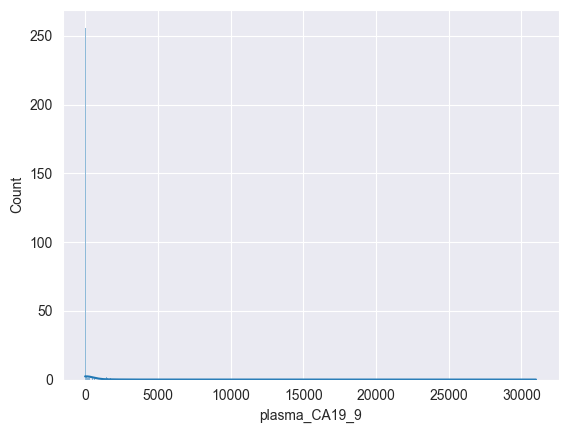

In [517]:
sns.histplot(data.plasma_CA19_9, kde = True)
plt.show()

In [518]:
data.plasma_CA19_9.value_counts()

plasma_CA19_9
26.5      240
9.0         8
11.0        8
7.0         6
4.0         5
         ... 
263.0       1
1913.0      1
72.0        1
32.0        1
1488.0      1
Name: count, Length: 267, dtype: int64

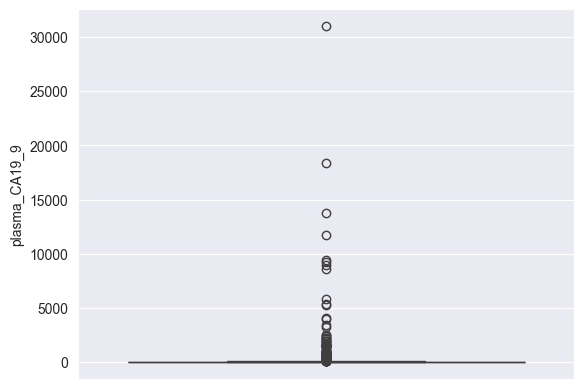

In [519]:
sns.boxplot(data.plasma_CA19_9)
plt.show()

In [520]:
data.creatinine

0      1.83222
1      0.97266
2      0.78039
3      0.70122
4      0.21489
        ...   
585    0.52026
586    0.85956
587    1.36851
588    1.33458
589    1.50423
Name: creatinine, Length: 590, dtype: float64

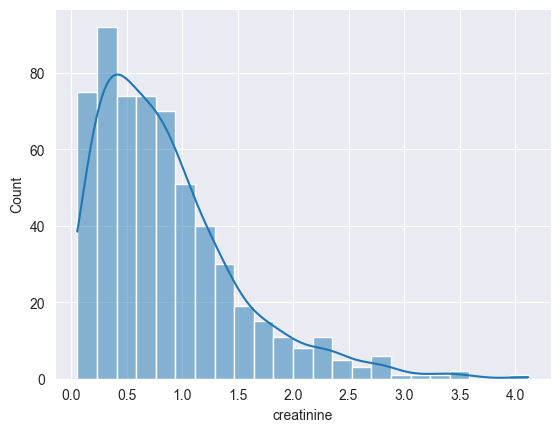

In [521]:
sns.histplot(data.creatinine, kde = True)
plt.show()

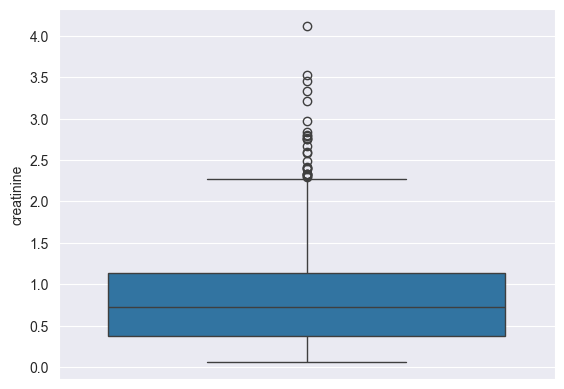

In [522]:
sns.boxplot(data.creatinine)
plt.show()

In [523]:
data[['LYVE1', 'REG1B', 'TFF1','REG1A']]

,LYVE1,REG1B,TFF1,REG1A
0,0.893219,52.948840,654.282174,1262.0000
1,2.037585,94.467030,209.488250,228.4070
2,0.145589,102.366000,461.141000,208.5385
3,0.002805,60.579000,142.950000,208.5385
4,0.000860,65.540000,41.088000,208.5385
...,...,...,...,...
585,7.058209,156.241000,525.178000,208.5385
586,8.341207,16.915000,245.947000,208.5385
587,7.674707,289.701000,537.286000,208.5385
588,8.206777,205.930000,722.523000,208.5385


Histogram plot and Box plot:  LYVE1


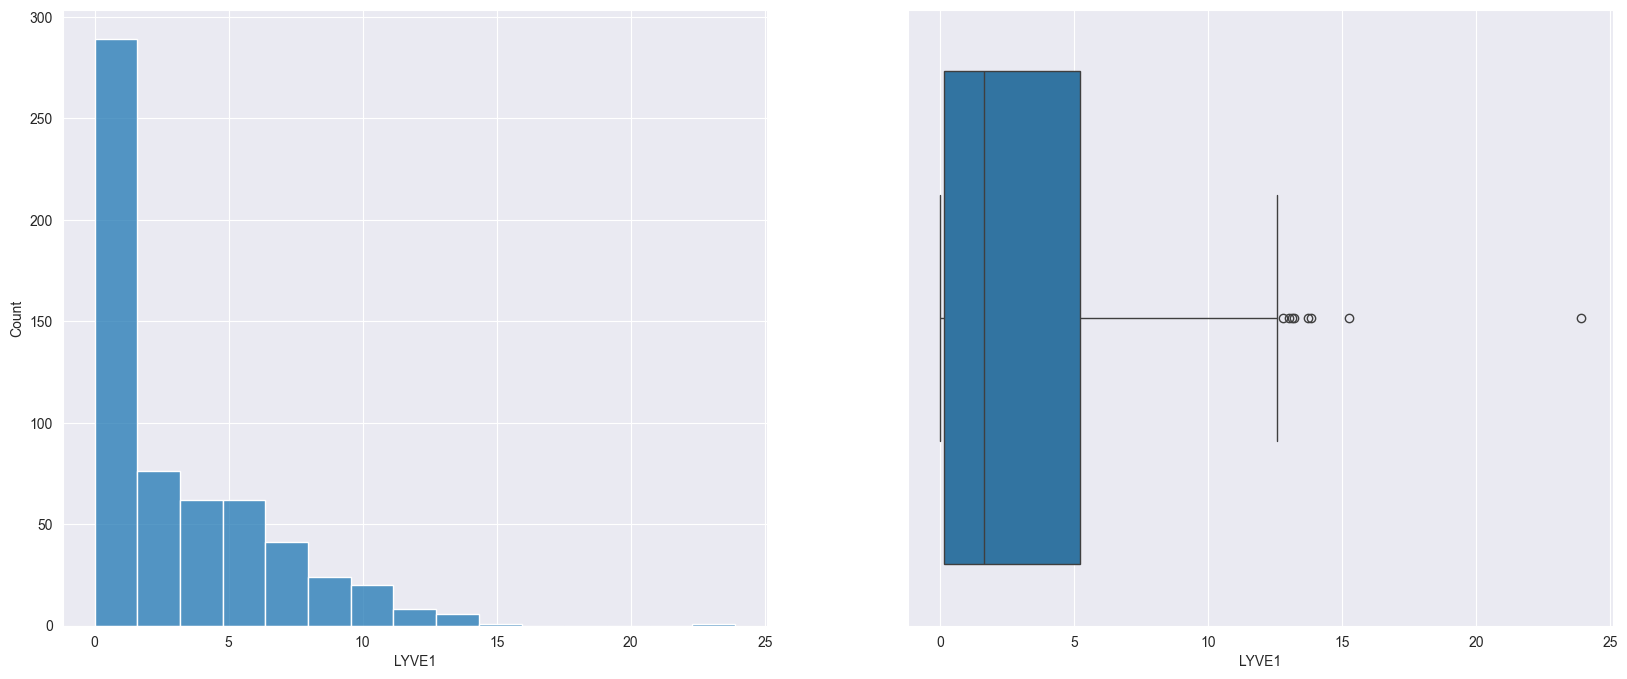

Histogram plot and Box plot:  REG1B


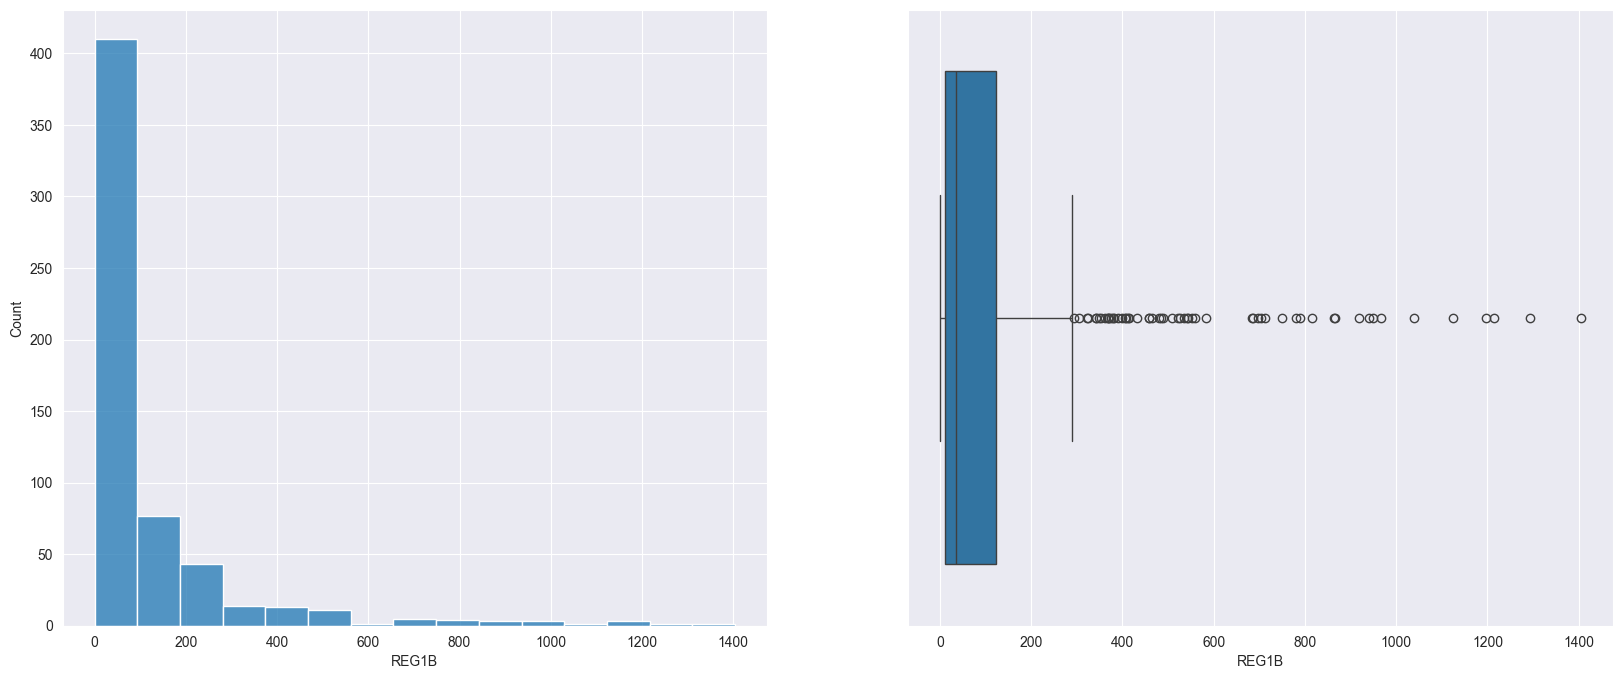

Histogram plot and Box plot:  TFF1


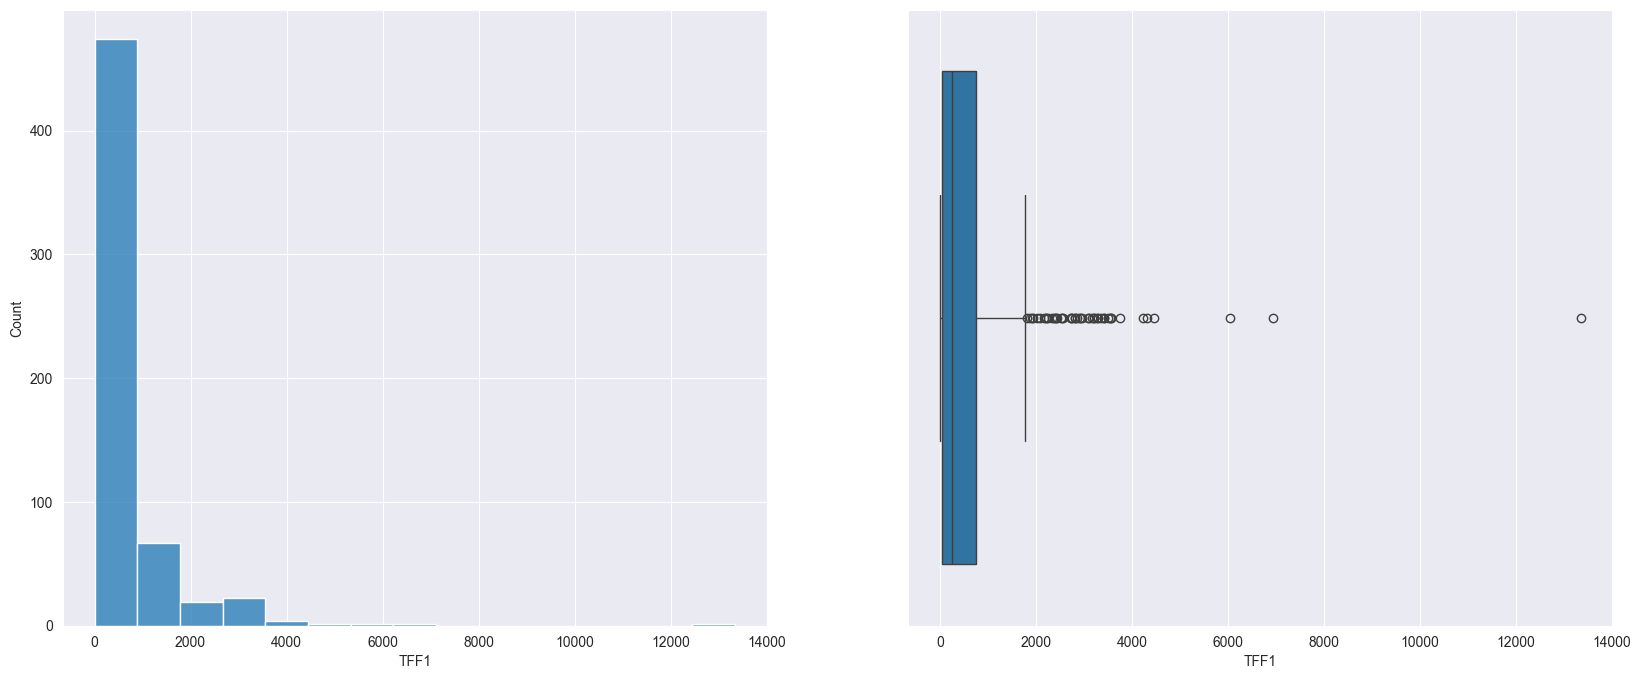

Histogram plot and Box plot:  REG1A


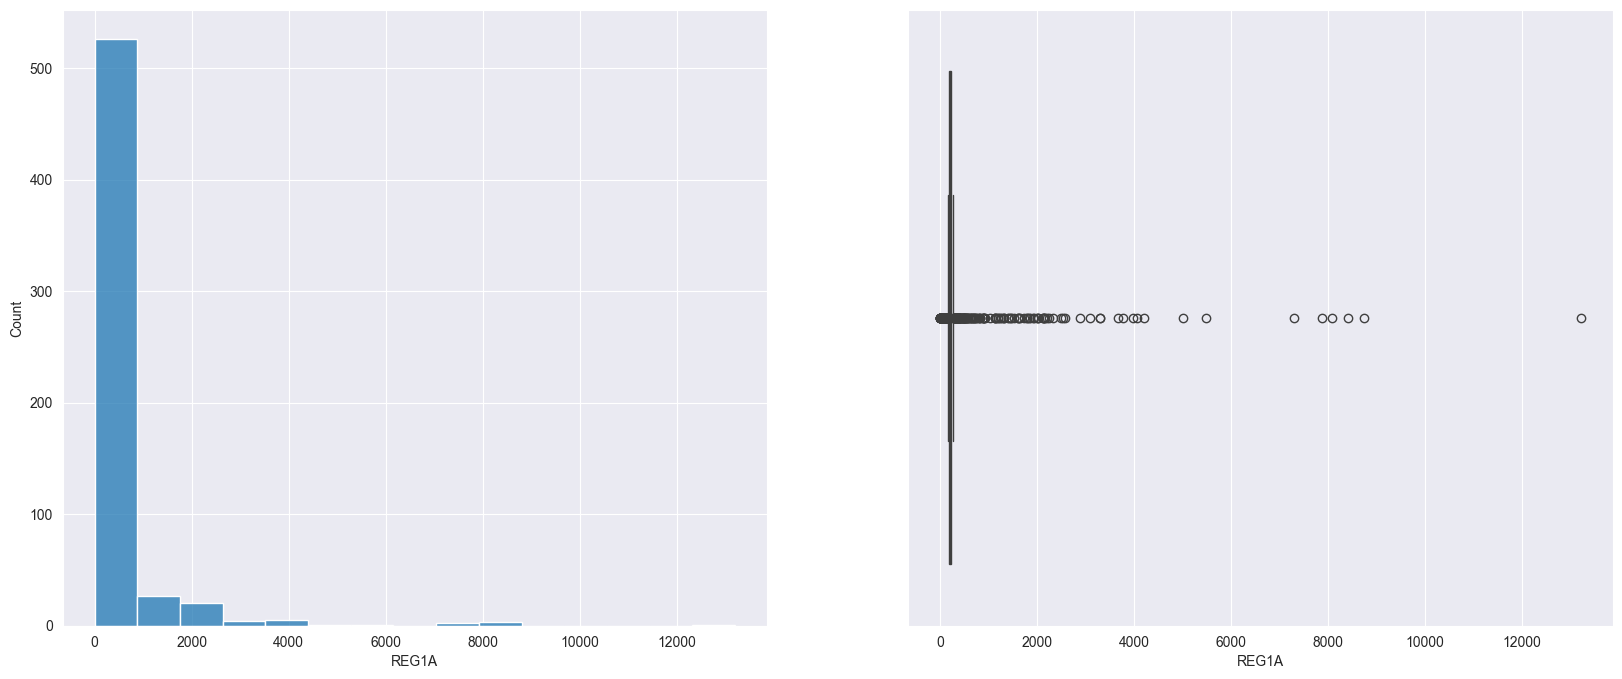

In [524]:
# A for loop to create histogram and boxplot plots for each of the remaining columns
for col in ['LYVE1', 'REG1B', 'TFF1','REG1A']:
    print("Histogram plot and Box plot: ", col)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    sns.histplot(data[col], ax=ax1, bins = 15)
    sns.boxplot(x = data[col], ax = ax2)
    plt.show()

In [525]:
data.columns

Index(['patient_cohort', 'age', 'sex', 'diagnosis', 'plasma_CA19_9',
       'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A'],
      dtype='object')

In [526]:
data.sample(5)

,patient_cohort,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
324,Cohort2,69,F,2,10.00000,0.05655,0.000226,5.112000,200.165000,208.5385
340,Cohort1,80,M,2,26.50000,0.61074,6.698661,7.420854,61.373998,105.6840
419,Cohort1,55,M,3,1004.00000,1.01790,8.776982,150.187310,1050.399550,462.9750
345,Cohort1,68,M,2,26.50000,2.39772,5.314655,84.830160,3535.778806,323.9630
68,Cohort2,65,F,1,2.52441,0.70122,0.028981,60.373450,28.980820,208.5385


In [527]:
categorical_cols = ['patient_cohort', 'sex', 'diagnosis']

In [528]:
numerical_cols = ['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']

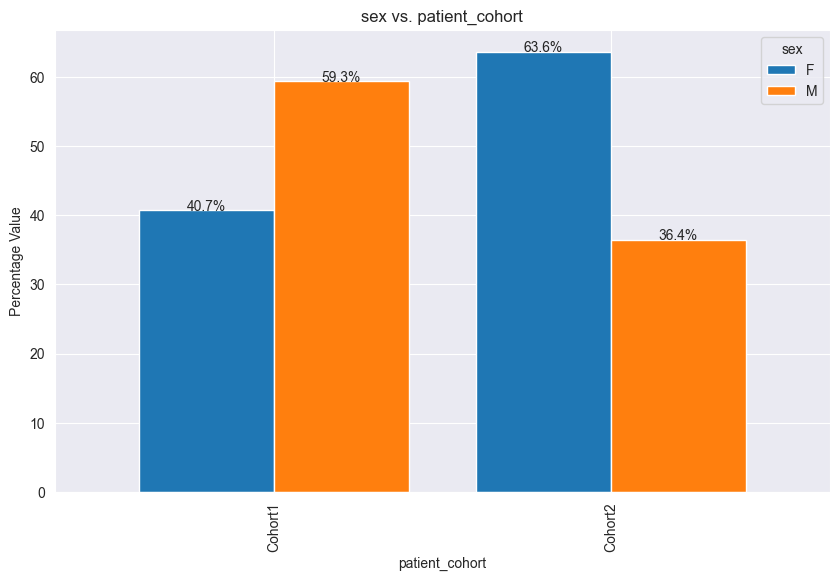

In [529]:
# Group by 'patient_cohort' and 'sex' and calculate the count
grouped = data.groupby(['patient_cohort', 'sex']).size().unstack(fill_value=0)

# Calculate the percentages
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Create a grouped bar plot
ax = grouped_percentage.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add labels and title
plt.xlabel('patient_cohort')
plt.ylabel('Percentage Value')
plt.title('sex vs. patient_cohort')

# Add legend
plt.legend(title='sex', labels = data.sex.value_counts().index)

# Add percentage values on top of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height), ha='center')

# Display the plot
plt.show()

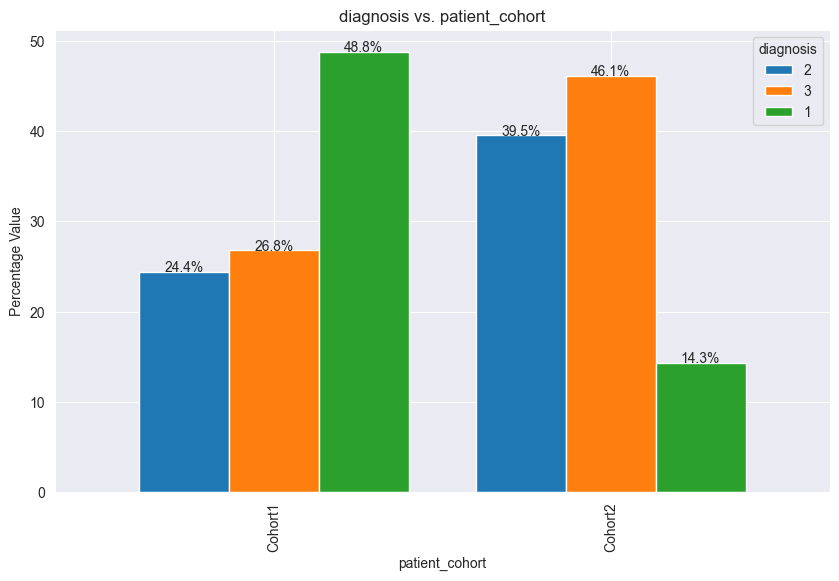

In [530]:
# Group by 'patient_cohort' and 'diagnosis' and calculate the count
grouped = data.groupby(['patient_cohort', 'diagnosis']).size().unstack(fill_value=0)

# Calculate the percentages
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Create a grouped bar plot
ax = grouped_percentage.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add labels and title
plt.xlabel('patient_cohort')
plt.ylabel('Percentage Value')
plt.title('diagnosis vs. patient_cohort')

# Add legend
plt.legend(title='diagnosis', labels = data.diagnosis.value_counts().index)

# Add percentage values on top of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height), ha='center')

# Display the plot
plt.show()

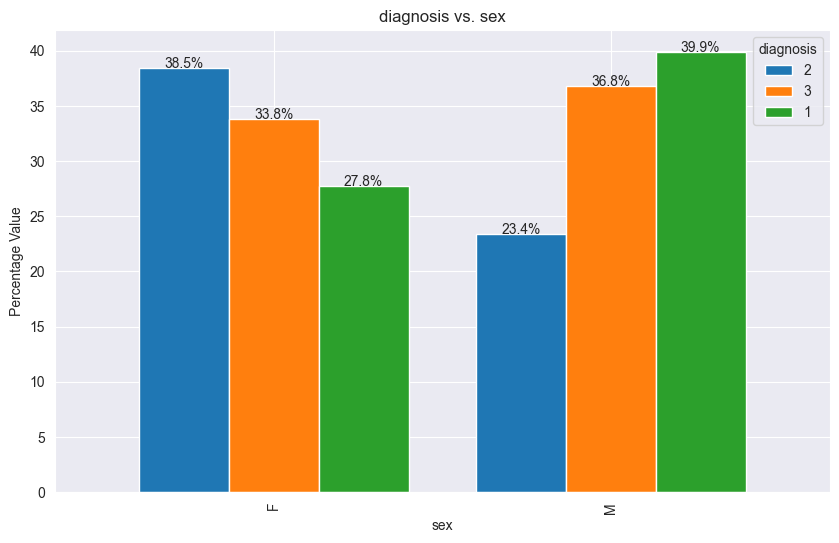

In [531]:
# Group by 'sex' and 'diagnosis' and calculate the count
grouped = data.groupby(['sex', 'diagnosis']).size().unstack(fill_value=0)

# Calculate the percentages
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Create a grouped bar plot
ax = grouped_percentage.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add labels and title
plt.xlabel('sex')
plt.ylabel('Percentage Value')
plt.title('diagnosis vs. sex')

# Add legend
plt.legend(title='diagnosis', labels = data.diagnosis.value_counts().index)

# Add percentage values on top of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height), ha='center')

# Display the plot
plt.show()

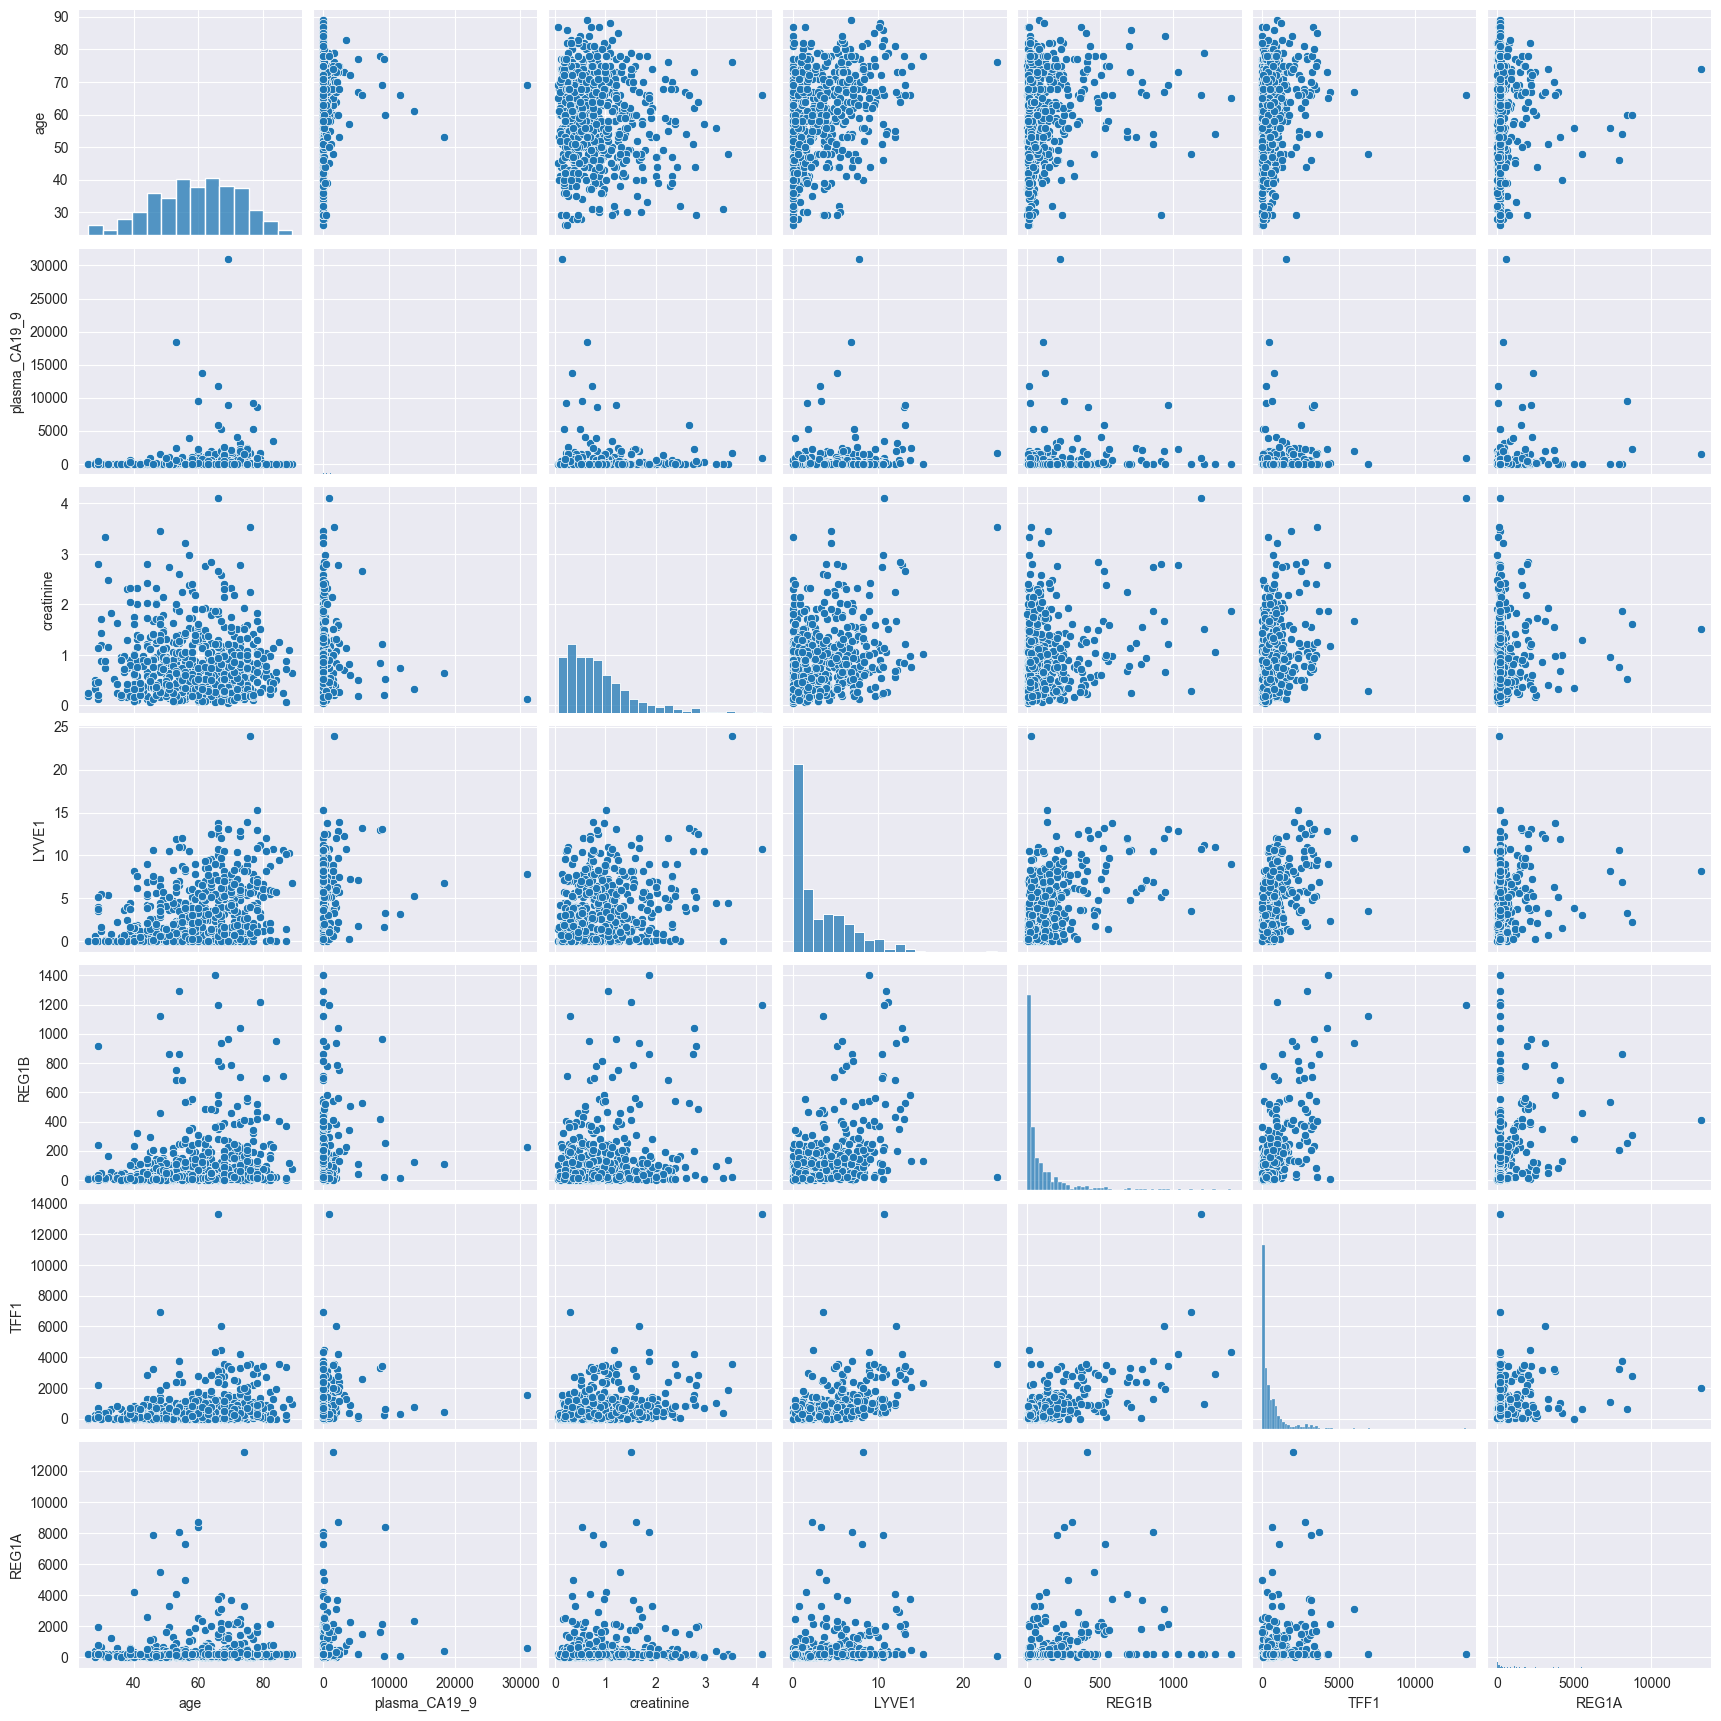

In [532]:
sns.pairplot(data[numerical_cols])

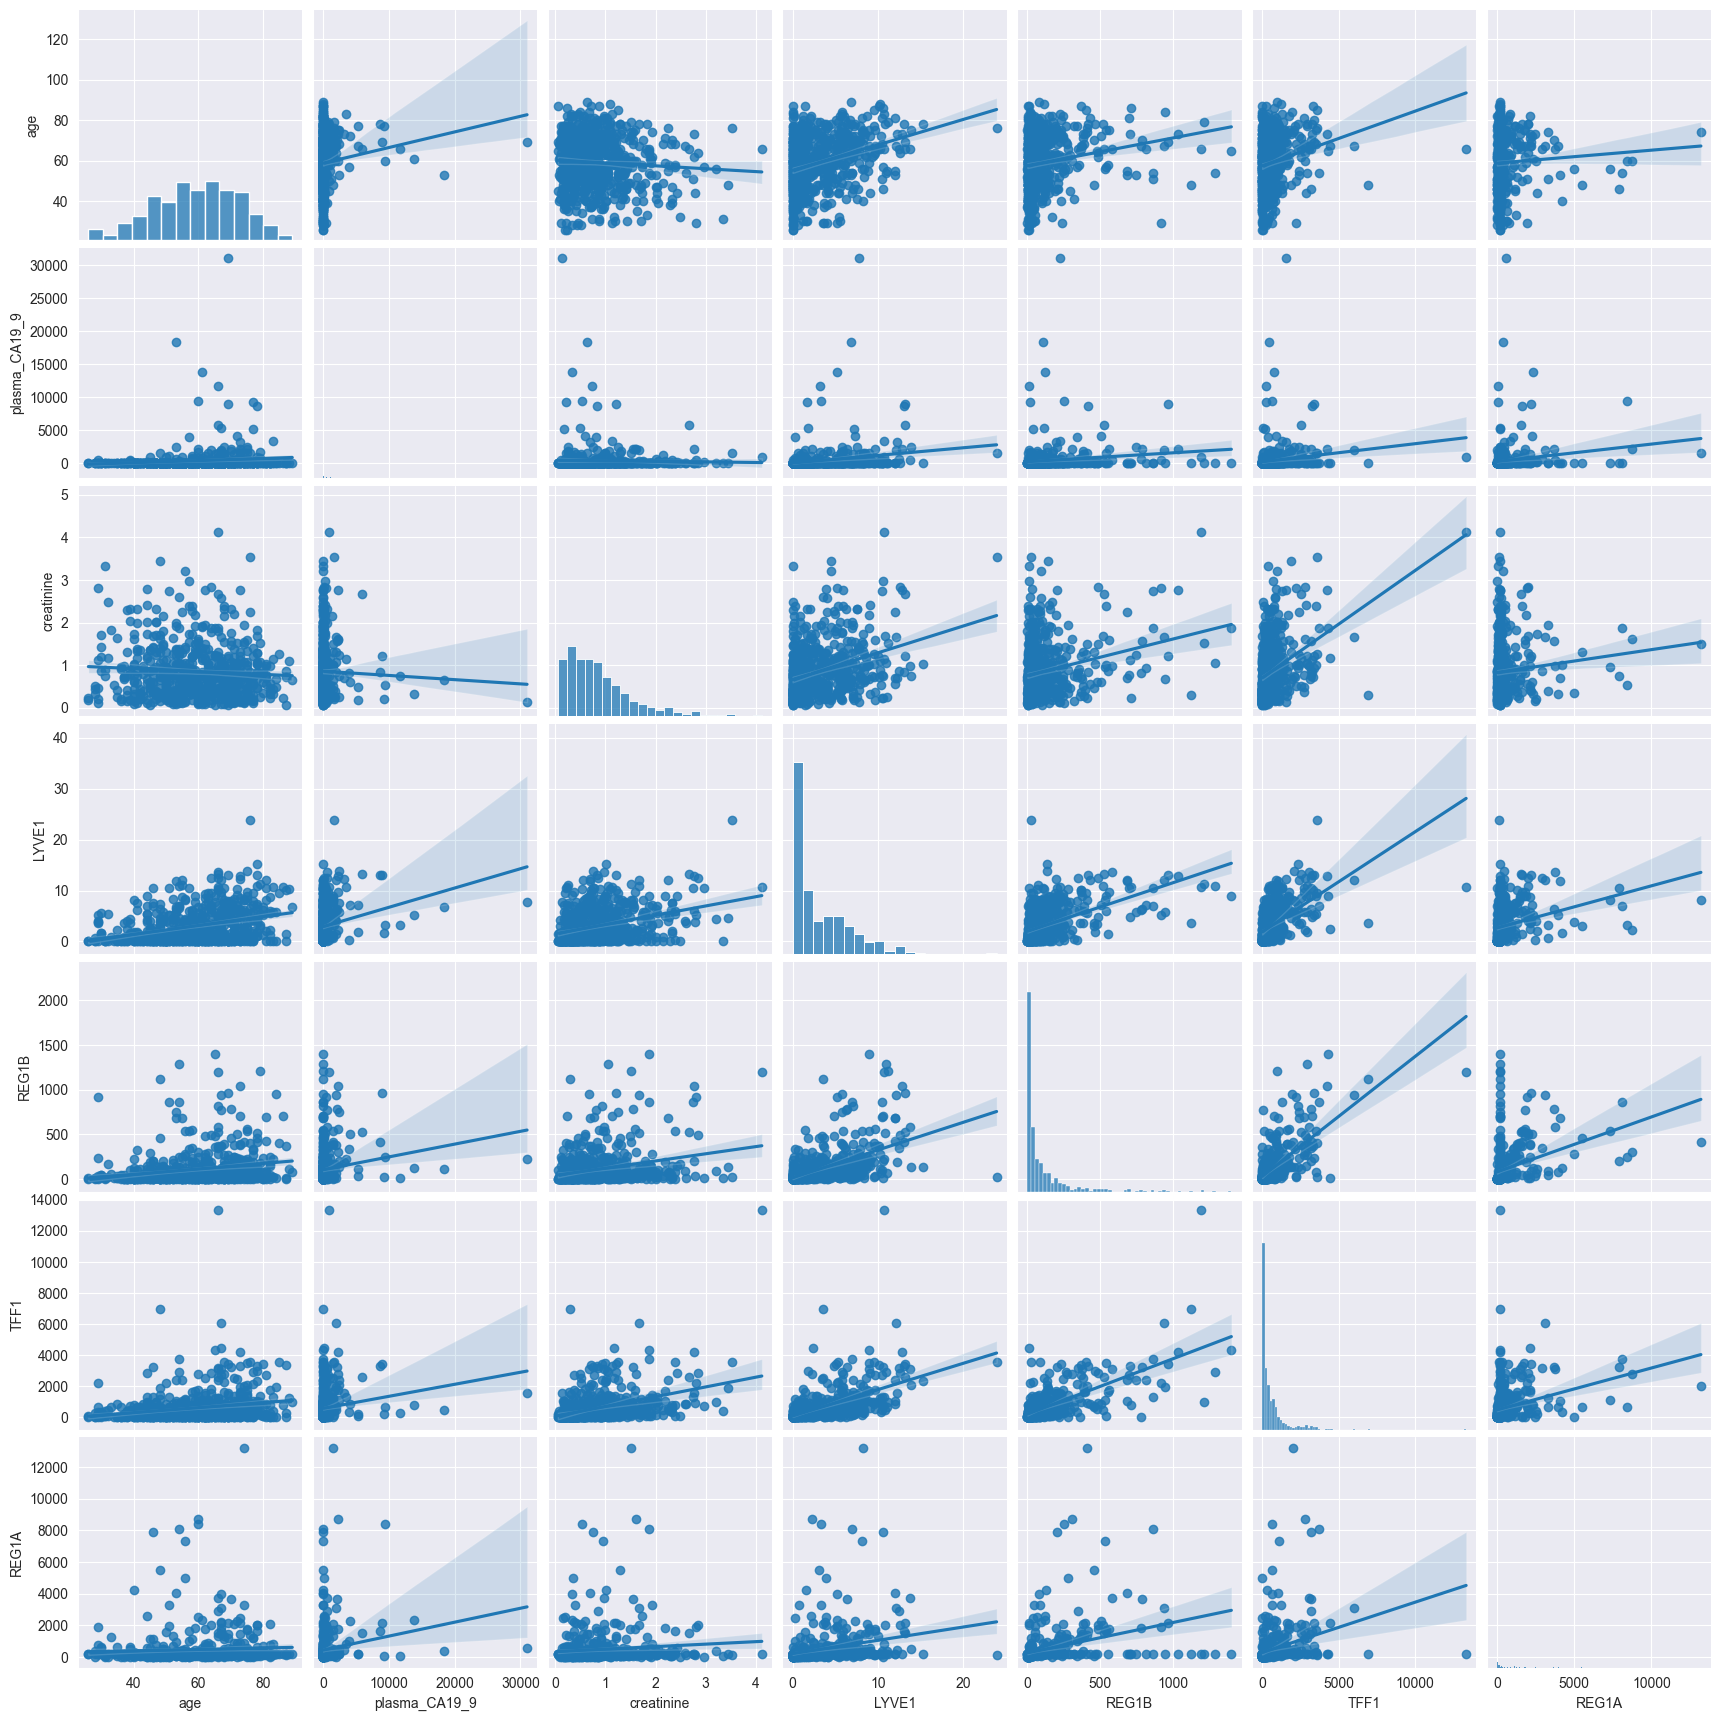

In [533]:
sns.pairplot(data[numerical_cols], kind = 'reg')

<Axes: >

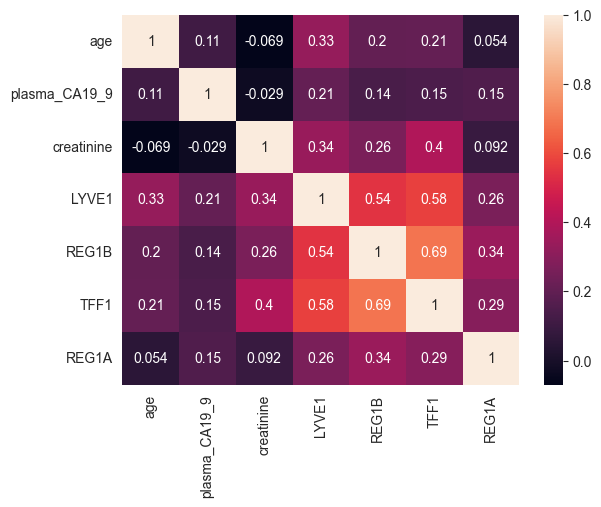

In [534]:
sns.heatmap(data[numerical_cols].corr(), annot = True)

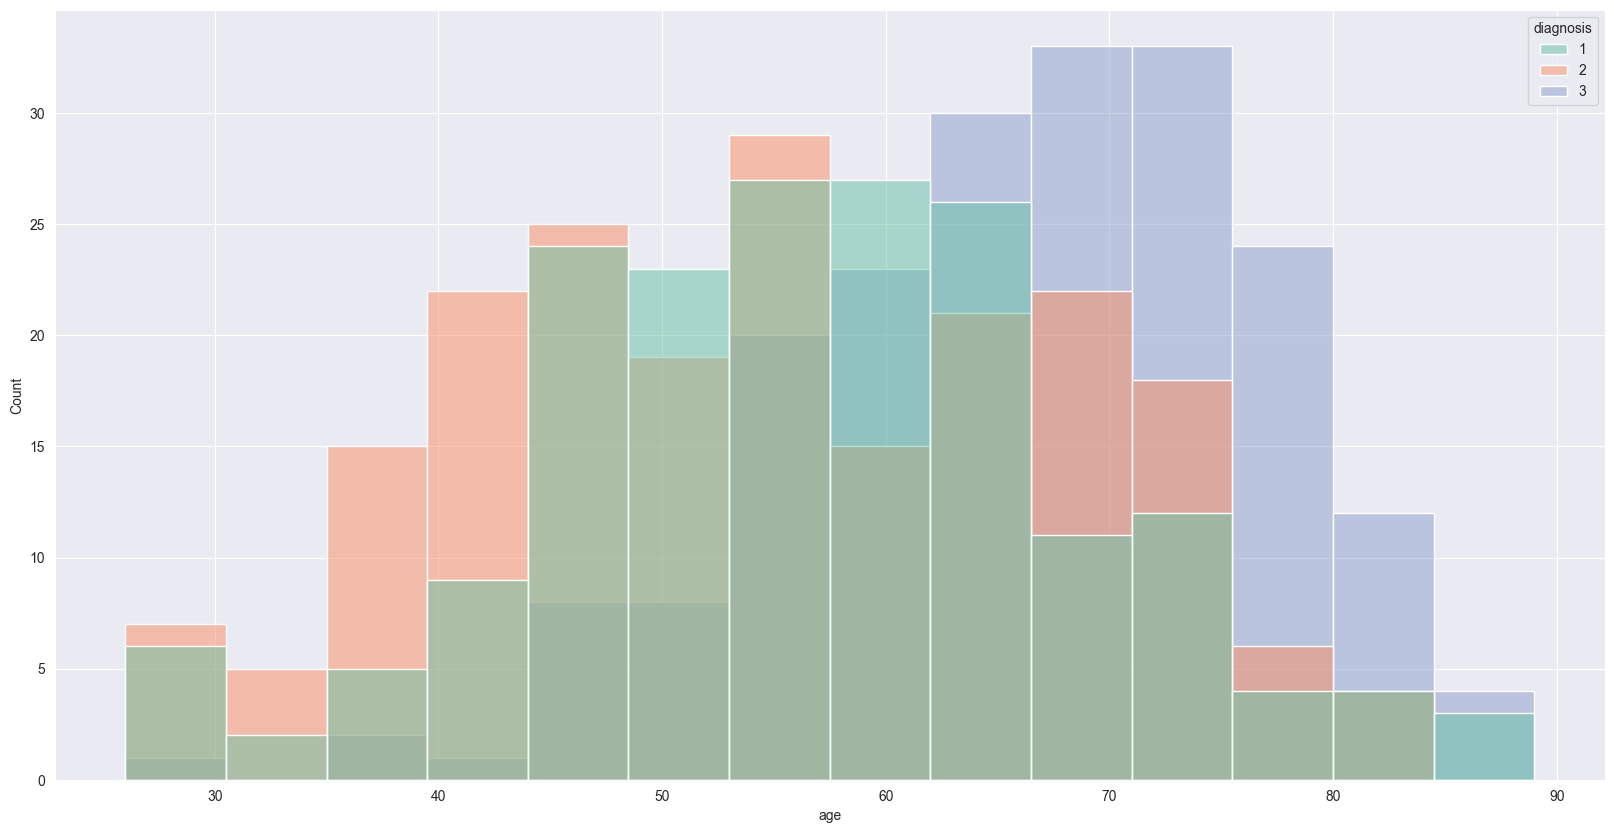

In [535]:
plt.figure(figsize = (20, 10))
sns.histplot(data = data, x = "age", hue = "diagnosis", palette='Set2')
plt.show()

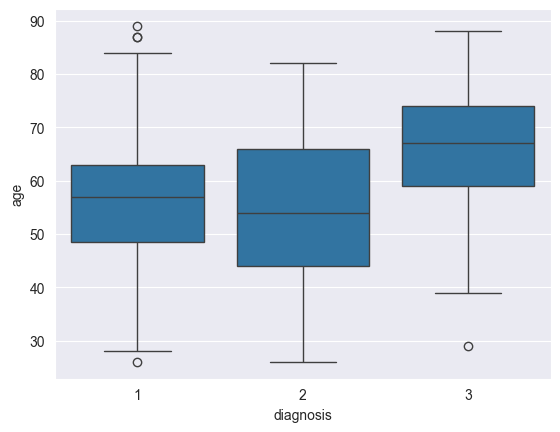

In [536]:
sns.boxplot(x = data.diagnosis, y = data['age'])
plt.show()

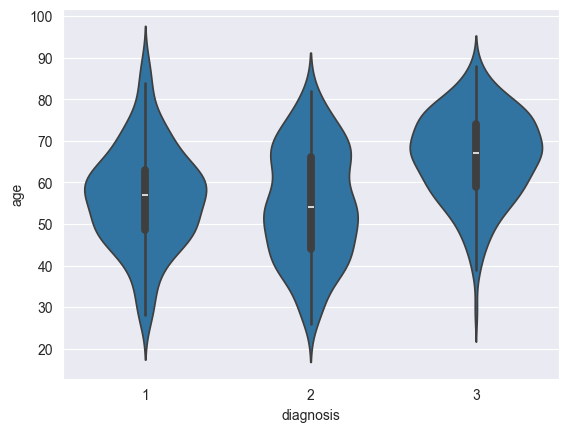

In [537]:
sns.violinplot(x = data.diagnosis, y = data['age'])
plt.show()

In [538]:
data[categorical_cols]

,patient_cohort,sex,diagnosis
0,Cohort1,F,1
1,Cohort1,F,1
2,Cohort2,M,1
3,Cohort2,M,1
4,Cohort2,M,1
...,...,...,...
585,Cohort2,M,3
586,Cohort2,F,3
587,Cohort2,M,3
588,Cohort2,F,3


In [539]:
pd.get_dummies(data['patient_cohort'], drop_first=True)

,Cohort2
0,False
1,False
2,True
3,True
4,True
...,...
585,True
586,True
587,True
588,True


In [540]:
data['patient_cohort_1?'] = pd.get_dummies(data['patient_cohort'], drop_first=True, dtype='int')
data.drop(columns = ['patient_cohort'], inplace=True)

In [541]:
data.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_1?
0,33,F,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.0000,0
1,81,F,1,26.5,0.97266,2.037585,94.46703,209.488250,228.4070,0
2,51,M,1,7.0,0.78039,0.145589,102.36600,461.141000,208.5385,1
3,61,M,1,8.0,0.70122,0.002805,60.57900,142.950000,208.5385,1
4,62,M,1,9.0,0.21489,0.000860,65.54000,41.088000,208.5385,1


In [542]:
pd.get_dummies(data['sex'], drop_first=True)

,M
0,False
1,False
2,True
3,True
4,True
...,...
585,True
586,False
587,True
588,False


In [543]:
data['is_male?'] = pd.get_dummies(data['sex'], drop_first=True, dtype = 'int')
data.drop(columns = ['sex'], inplace=True)

In [544]:
data.head()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_1?,is_male?
0,33,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.0000,0,0
1,81,1,26.5,0.97266,2.037585,94.46703,209.488250,228.4070,0,0
2,51,1,7.0,0.78039,0.145589,102.36600,461.141000,208.5385,1,1
3,61,1,8.0,0.70122,0.002805,60.57900,142.950000,208.5385,1,1
4,62,1,9.0,0.21489,0.000860,65.54000,41.088000,208.5385,1,1


In [545]:
data[numerical_cols]

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,11.7,1.83222,0.893219,52.948840,654.282174,1262.0000
1,81,26.5,0.97266,2.037585,94.467030,209.488250,228.4070
2,51,7.0,0.78039,0.145589,102.366000,461.141000,208.5385
3,61,8.0,0.70122,0.002805,60.579000,142.950000,208.5385
4,62,9.0,0.21489,0.000860,65.540000,41.088000,208.5385
...,...,...,...,...,...,...,...
585,68,26.5,0.52026,7.058209,156.241000,525.178000,208.5385
586,71,26.5,0.85956,8.341207,16.915000,245.947000,208.5385
587,63,26.5,1.36851,7.674707,289.701000,537.286000,208.5385
588,75,26.5,1.33458,8.206777,205.930000,722.523000,208.5385


In [546]:
data[numerical_cols].describe()

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,59.079661,398.747509,0.855383,3.063530,111.774090,597.868722,481.730488
std,13.109520,1896.028213,0.639028,3.438796,196.267110,1010.477245,1095.179818
min,26.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,50.000000,17.000000,0.373230,0.167179,10.757216,43.961000,195.201000
50%,60.000000,26.500000,0.723840,1.649862,34.303353,259.873974,208.538500
75%,69.000000,41.750000,1.139482,5.205037,122.741013,742.736000,224.007000
max,89.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


Histogram plot and Box plot:  age


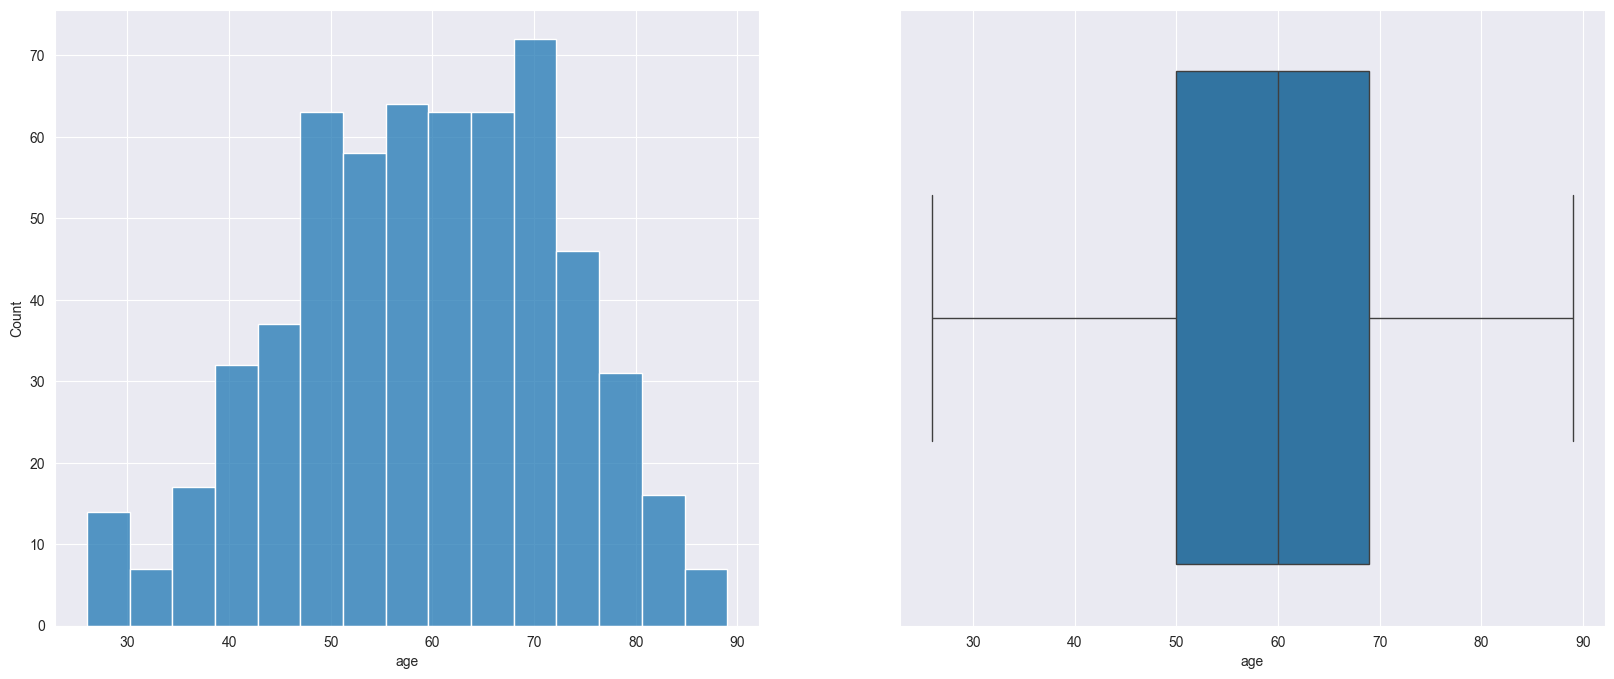

Histogram plot and Box plot:  plasma_CA19_9


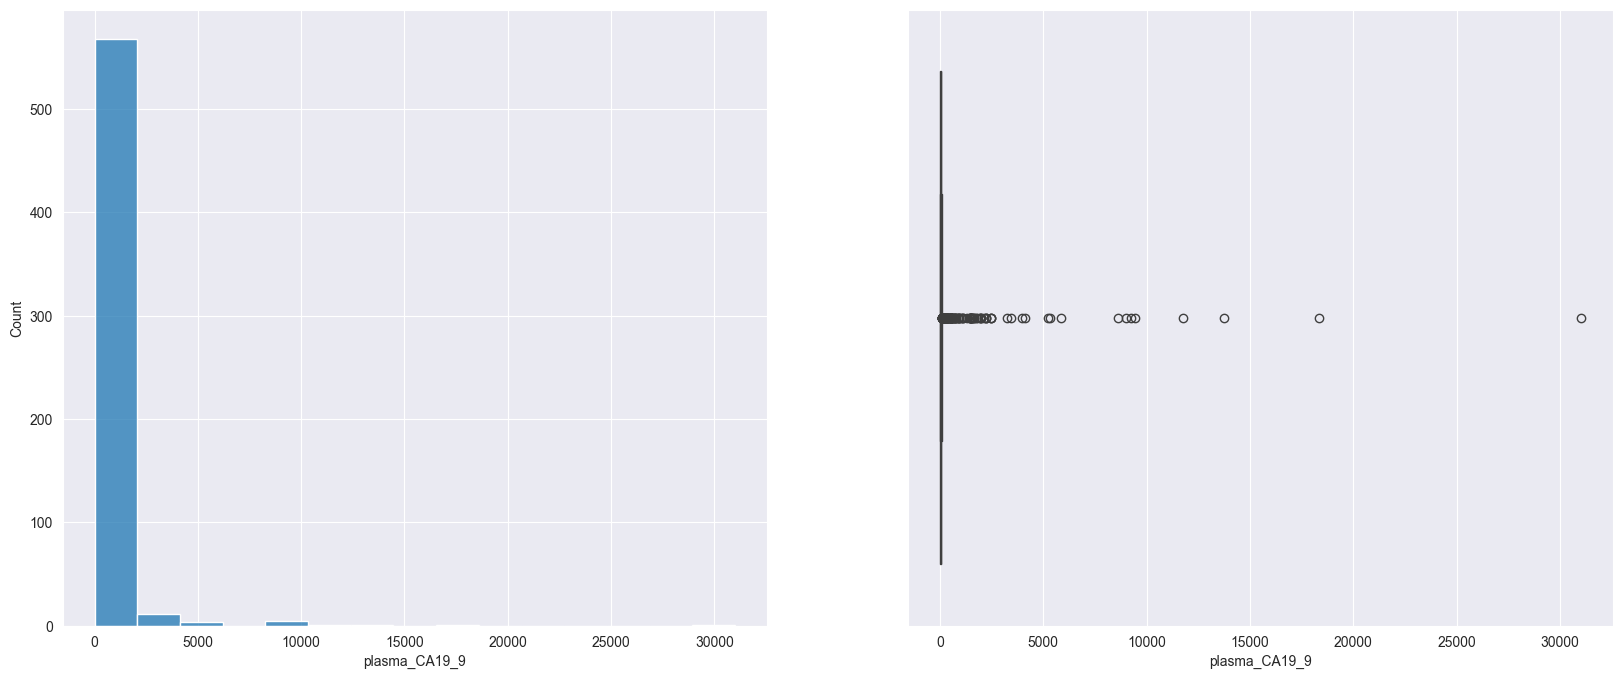

Histogram plot and Box plot:  creatinine


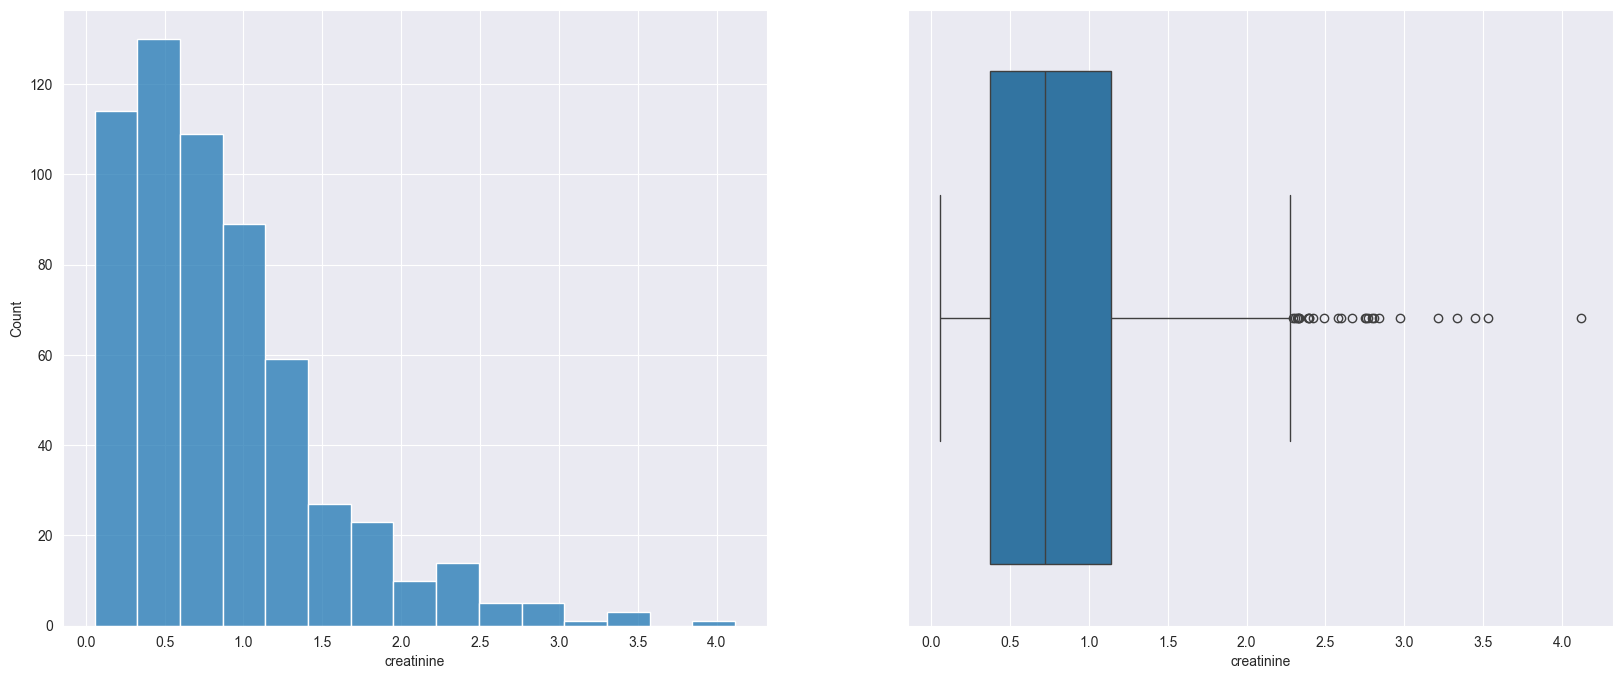

Histogram plot and Box plot:  LYVE1


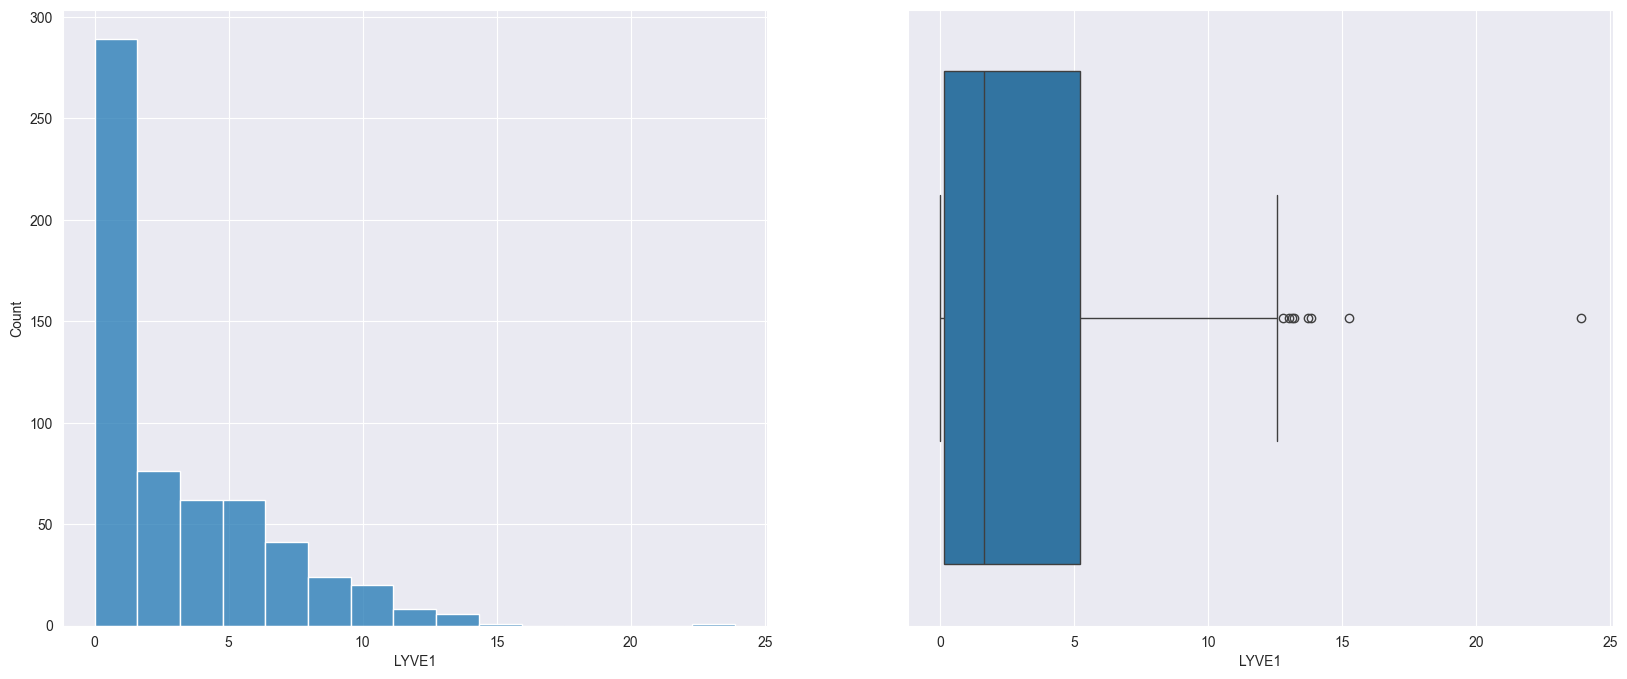

Histogram plot and Box plot:  REG1B


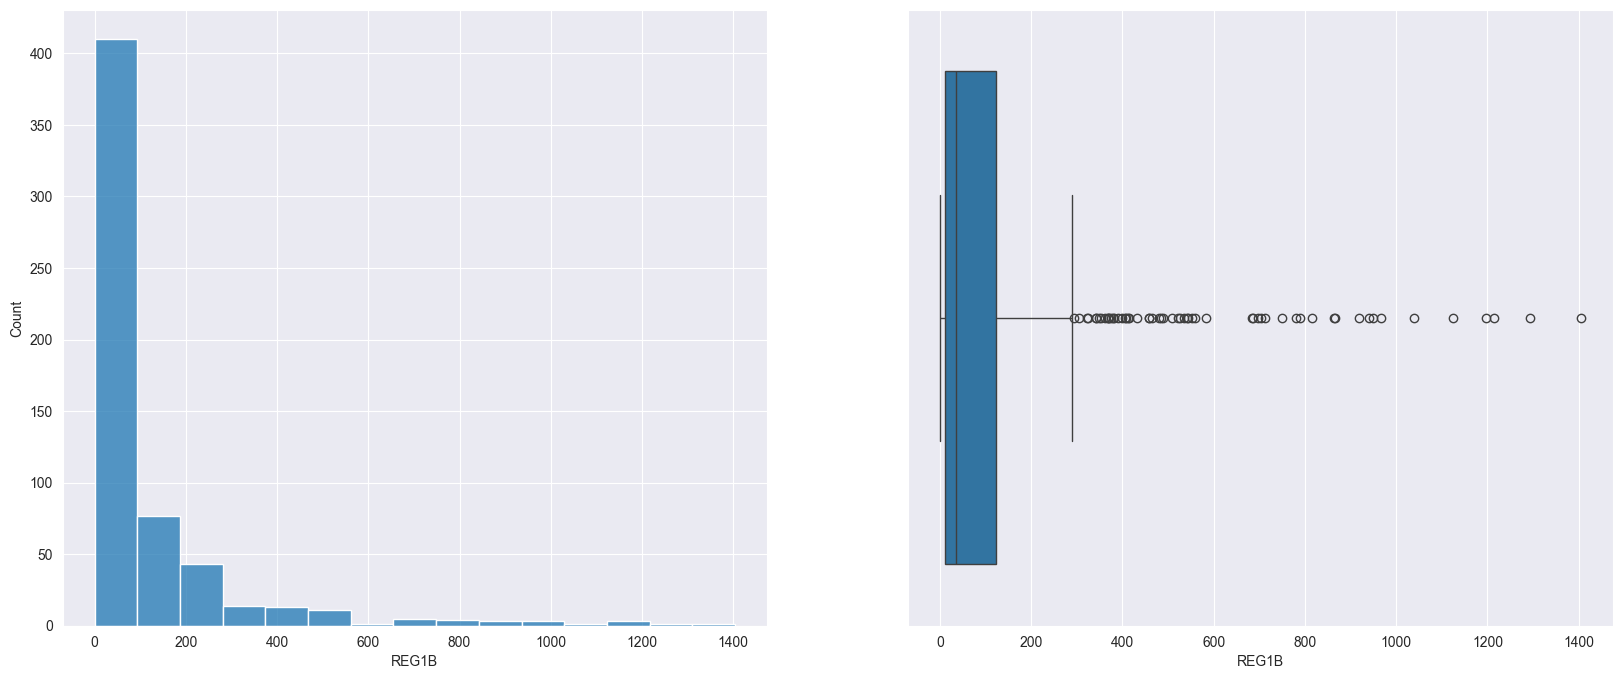

Histogram plot and Box plot:  TFF1


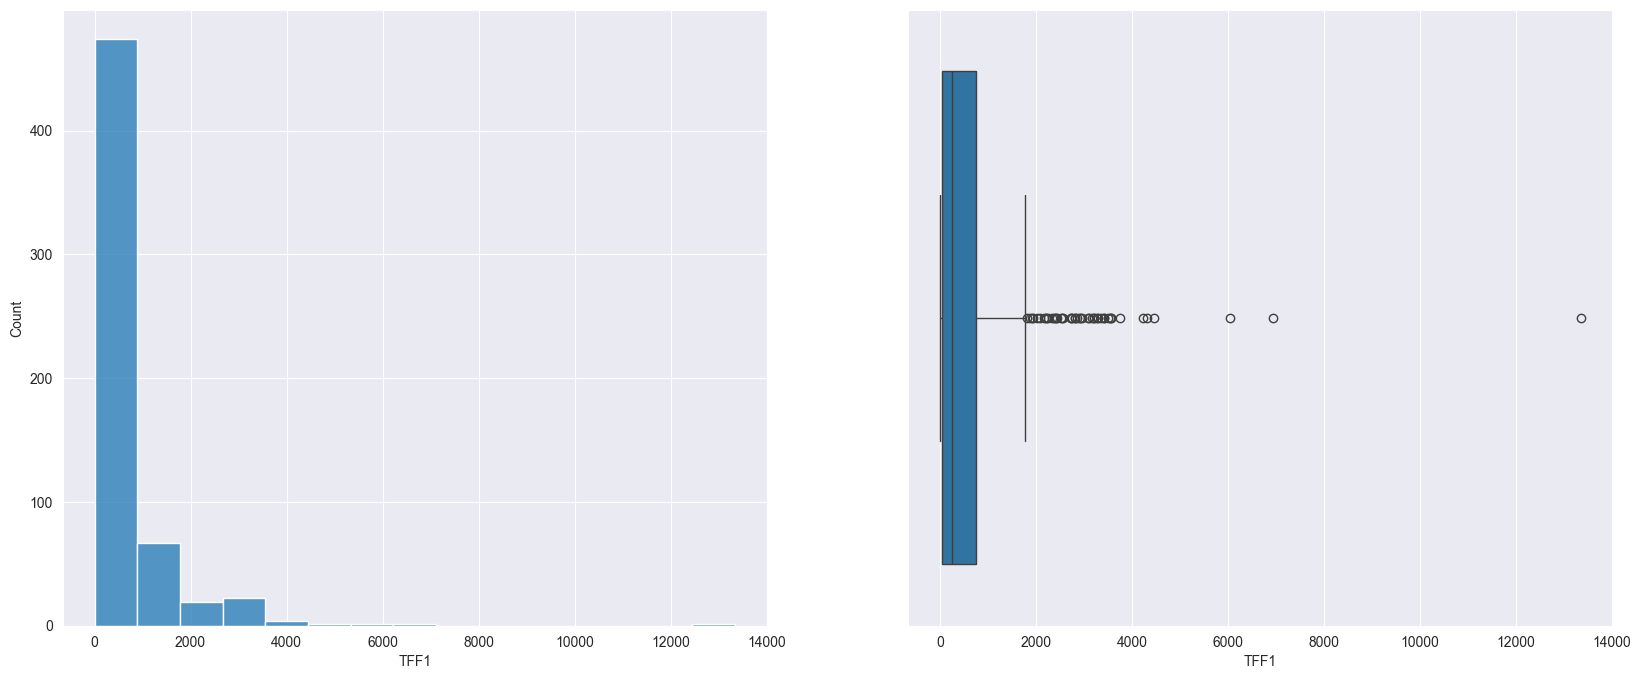

Histogram plot and Box plot:  REG1A


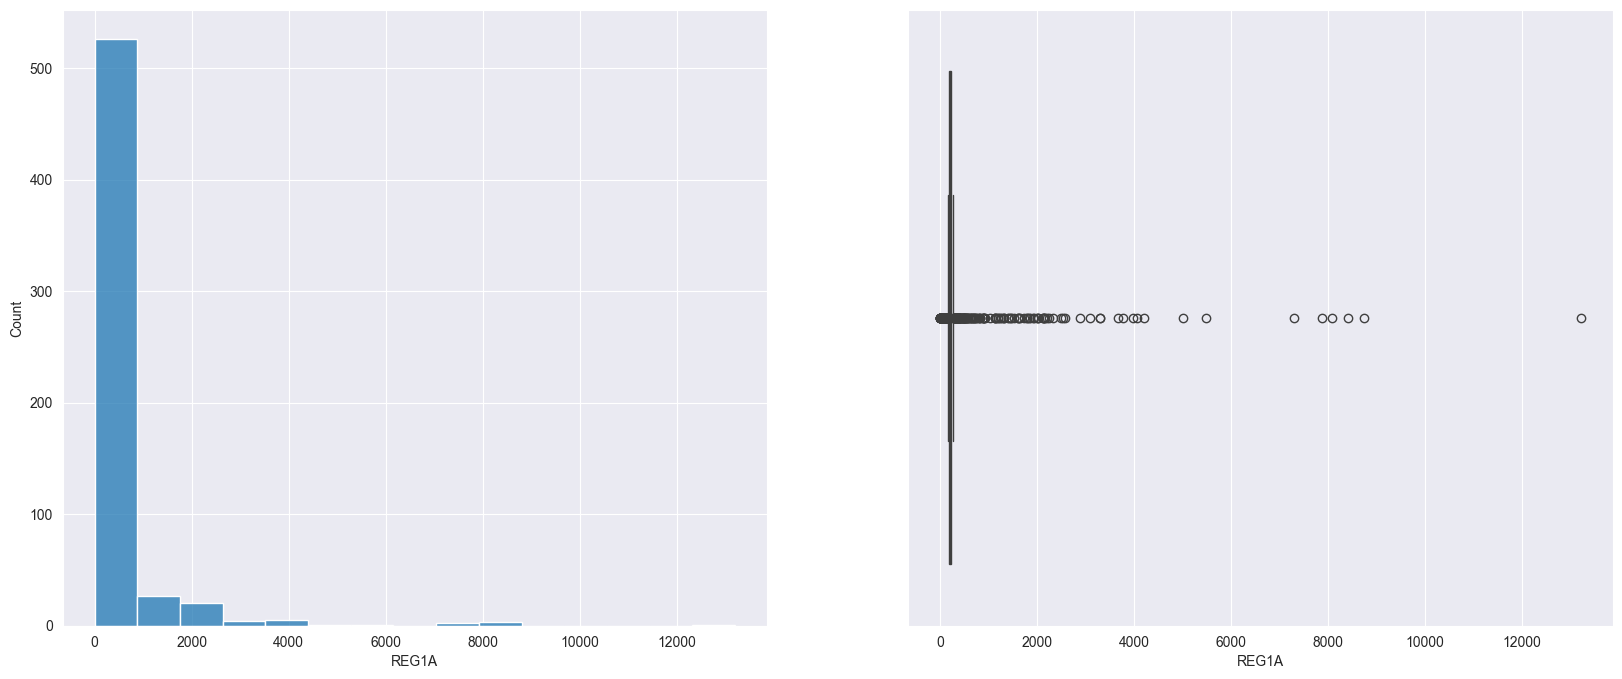

In [547]:
# A for loop to create histogram and boxplot plots for each of the numerical columns
for col in numerical_cols:
    print("Histogram plot and Box plot: ", col)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    sns.histplot(data[col], ax=ax1, bins = 15)
    sns.boxplot(x = data[col], ax = ax2)
    plt.show()

In [548]:
numerical_cols

['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']

In [549]:
data[['plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']] = np.log(
    data[['plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']] + 1)

In [550]:
data[numerical_cols].describe()

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,59.079661,3.651298,0.567379,1.054778,3.607996,4.979594,5.378932
std,13.109520,1.778027,0.309551,0.843309,1.574352,2.226808,1.197012
min,26.000000,0.000000,0.055009,0.000129,0.001104,0.005279,0.000000
25%,50.000000,2.890372,0.317166,0.154584,2.464467,3.805664,5.279135
50%,60.000000,3.314186,0.544554,0.974503,3.563973,5.563994,5.344907
75%,69.000000,3.755317,0.760561,1.825361,4.818184,6.611675,5.416119
max,89.000000,10.341775,1.632537,3.214479,7.247720,9.498920,9.488048


Histogram plot and Box plot:  age


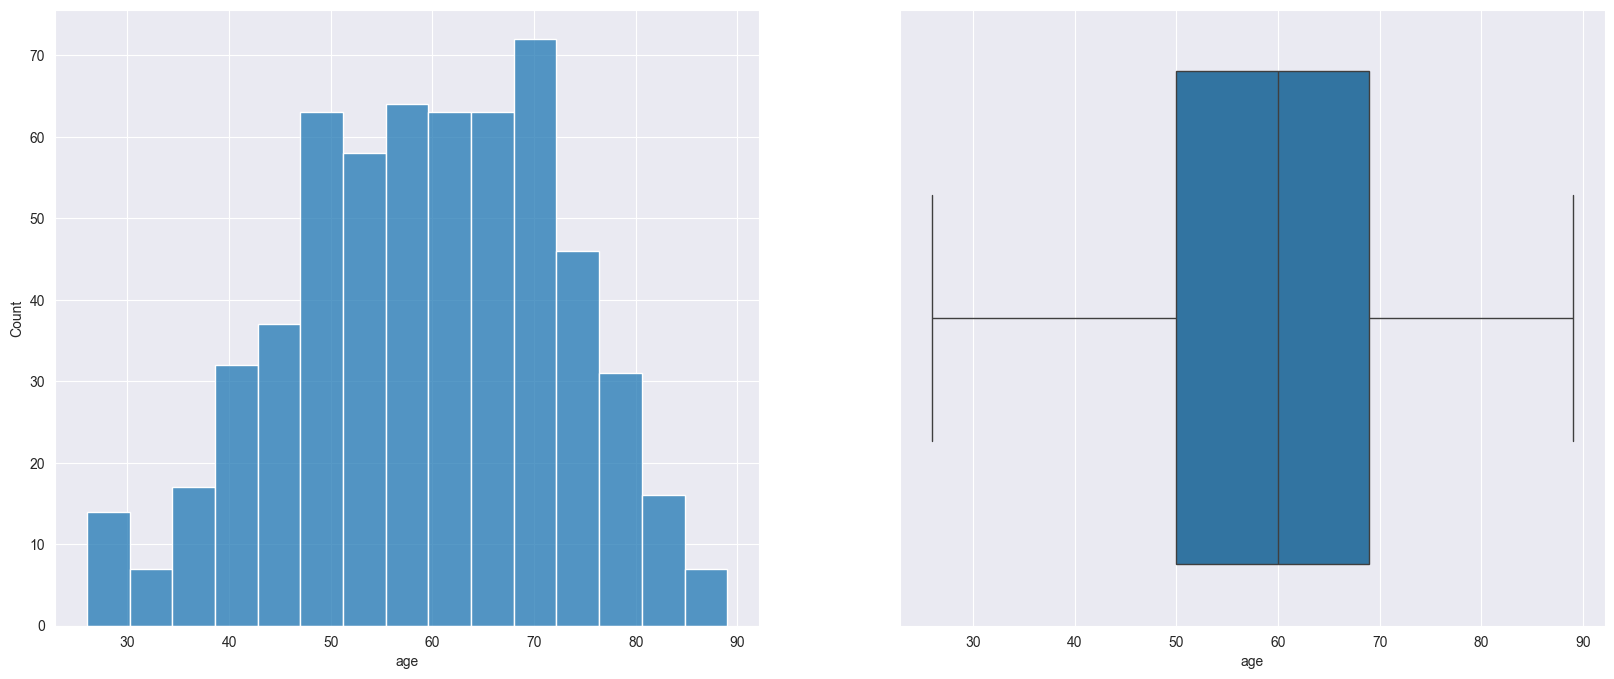

Histogram plot and Box plot:  plasma_CA19_9


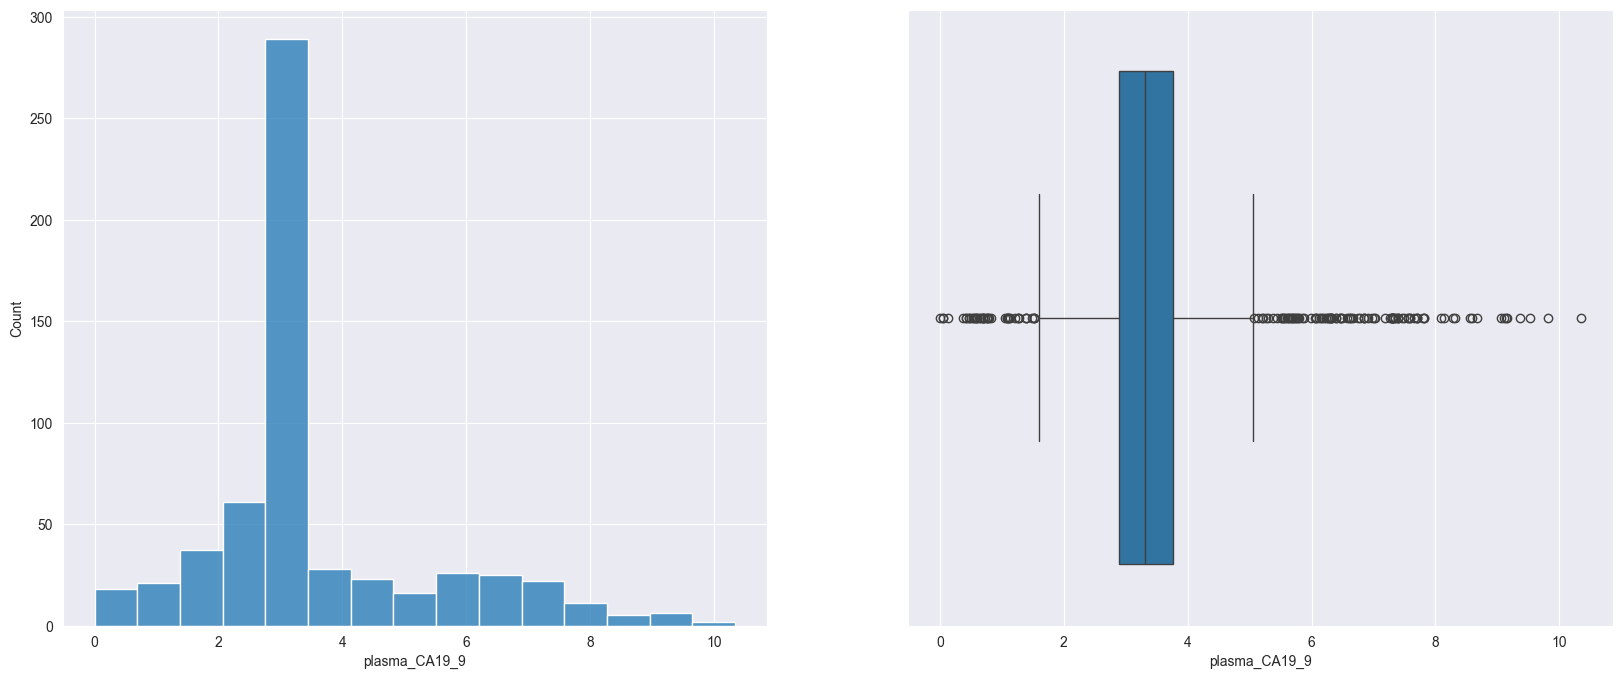

Histogram plot and Box plot:  creatinine


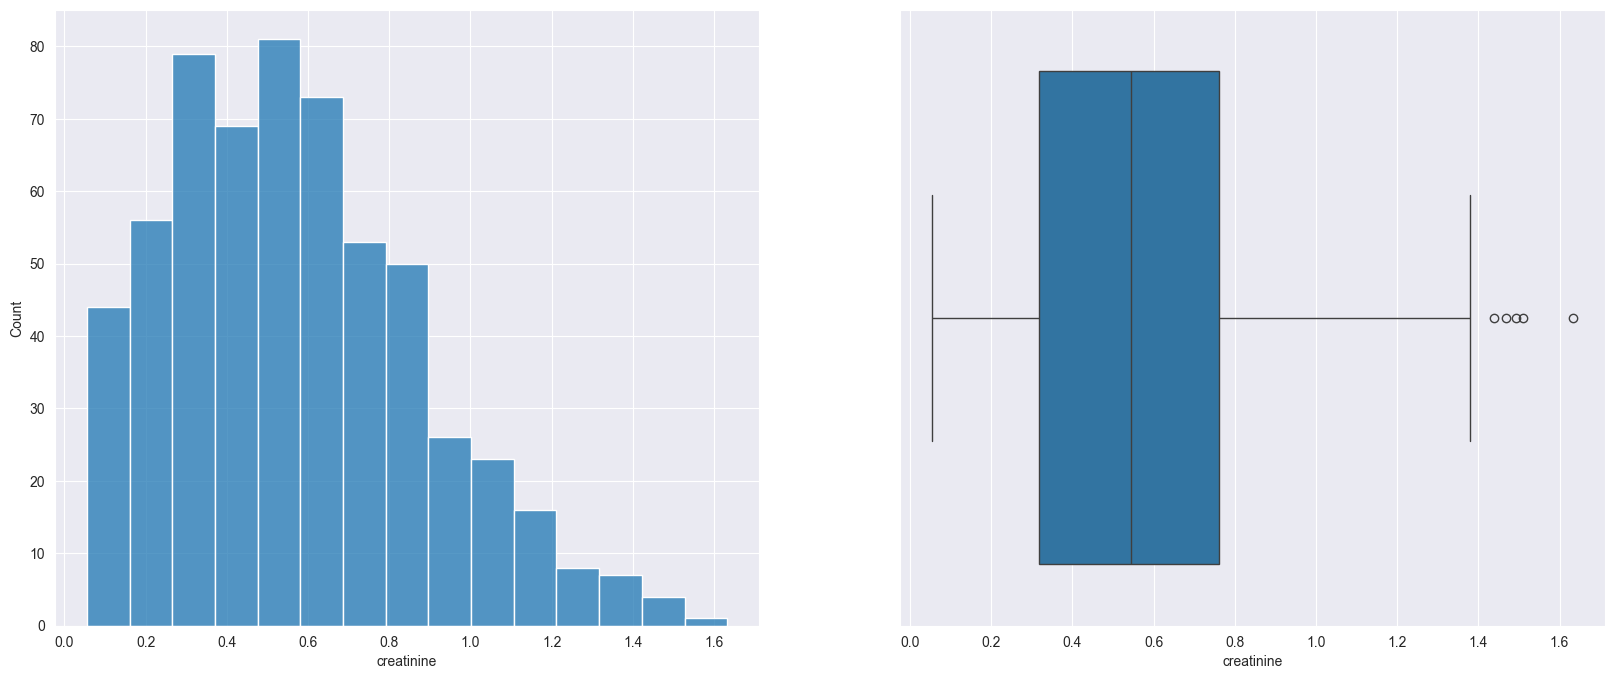

Histogram plot and Box plot:  LYVE1


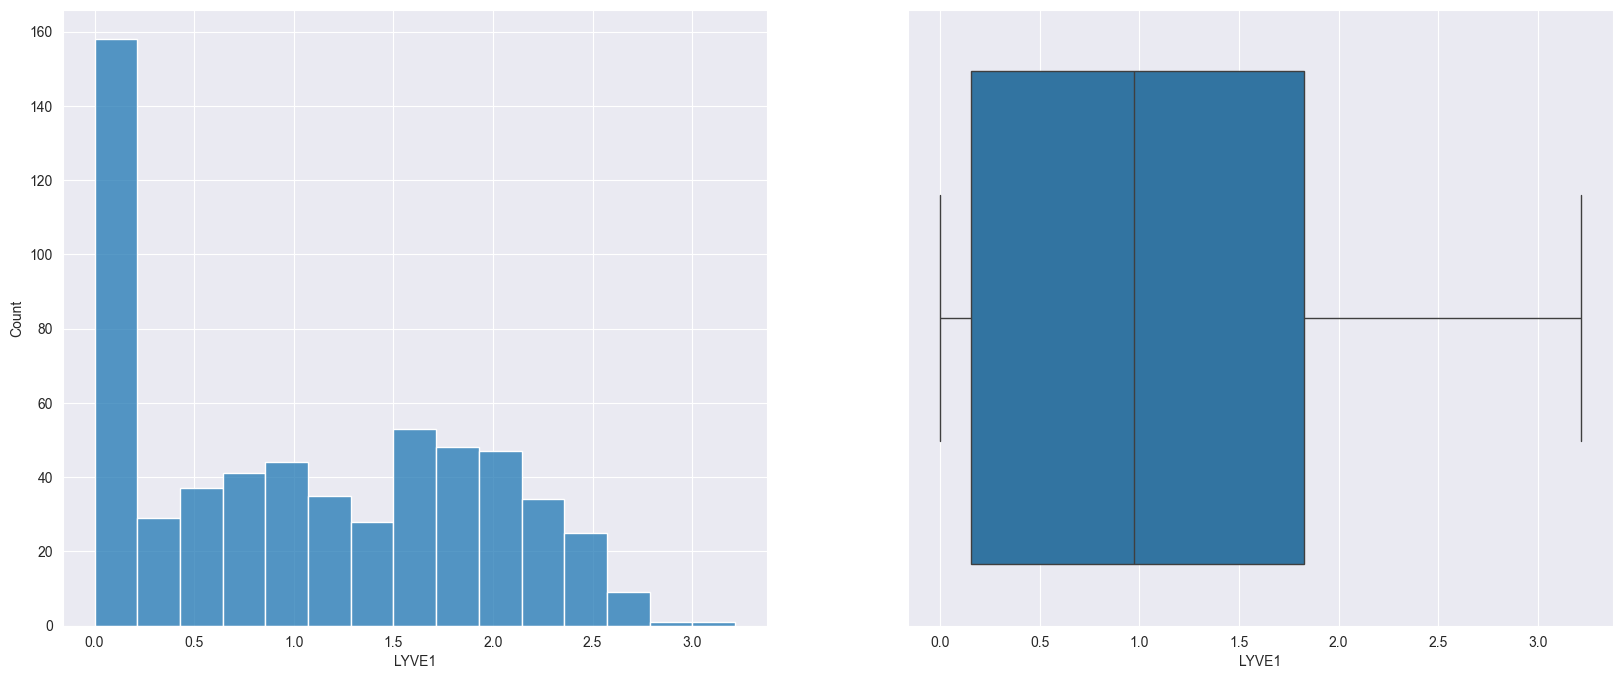

Histogram plot and Box plot:  REG1B


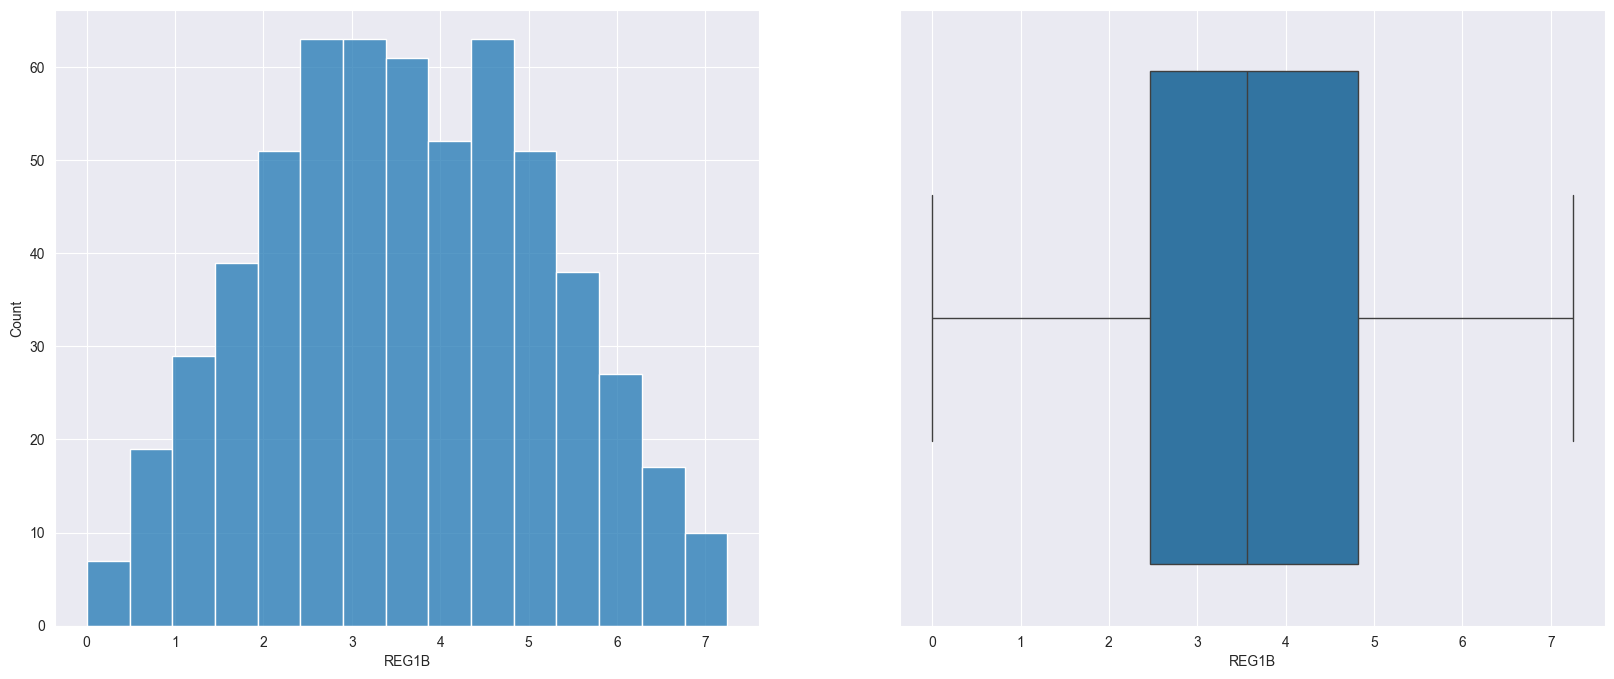

Histogram plot and Box plot:  TFF1


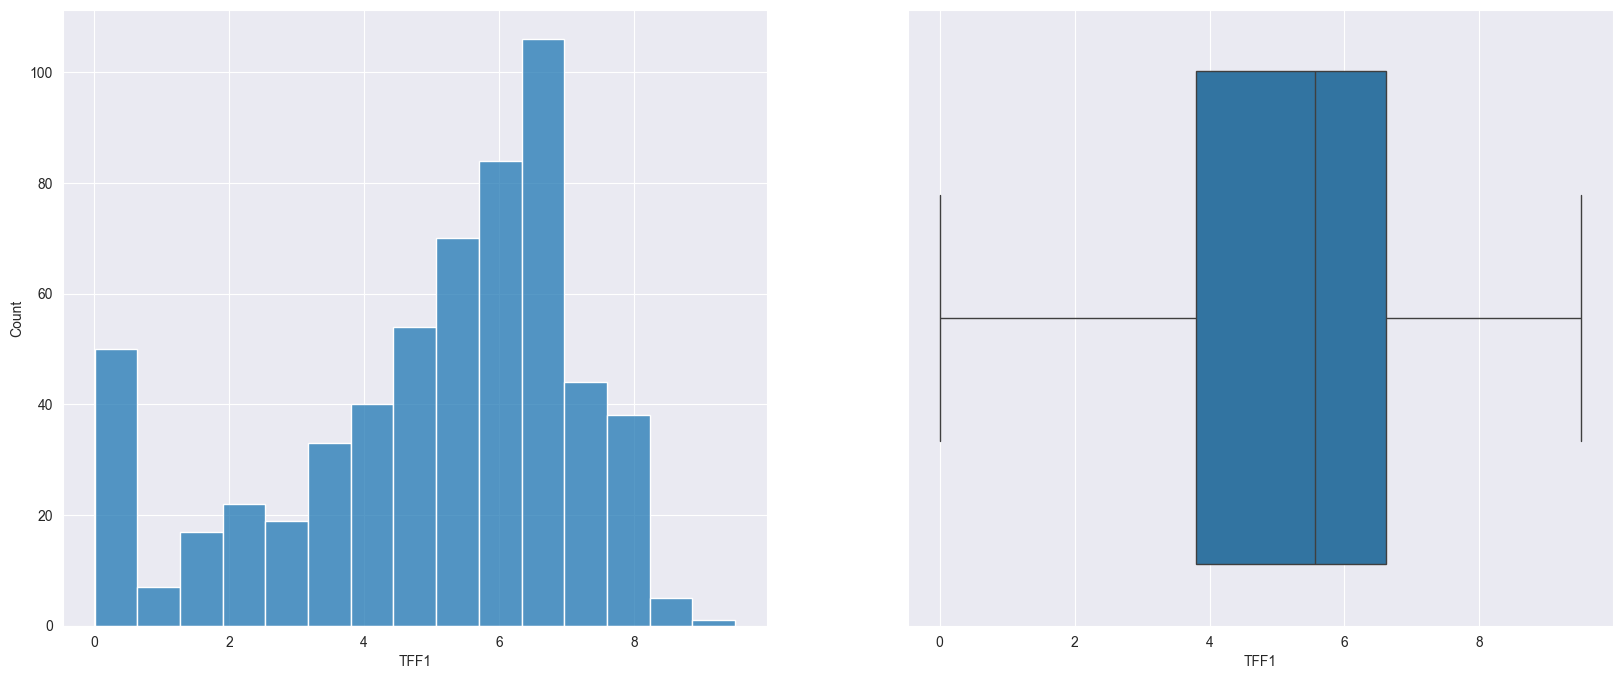

Histogram plot and Box plot:  REG1A


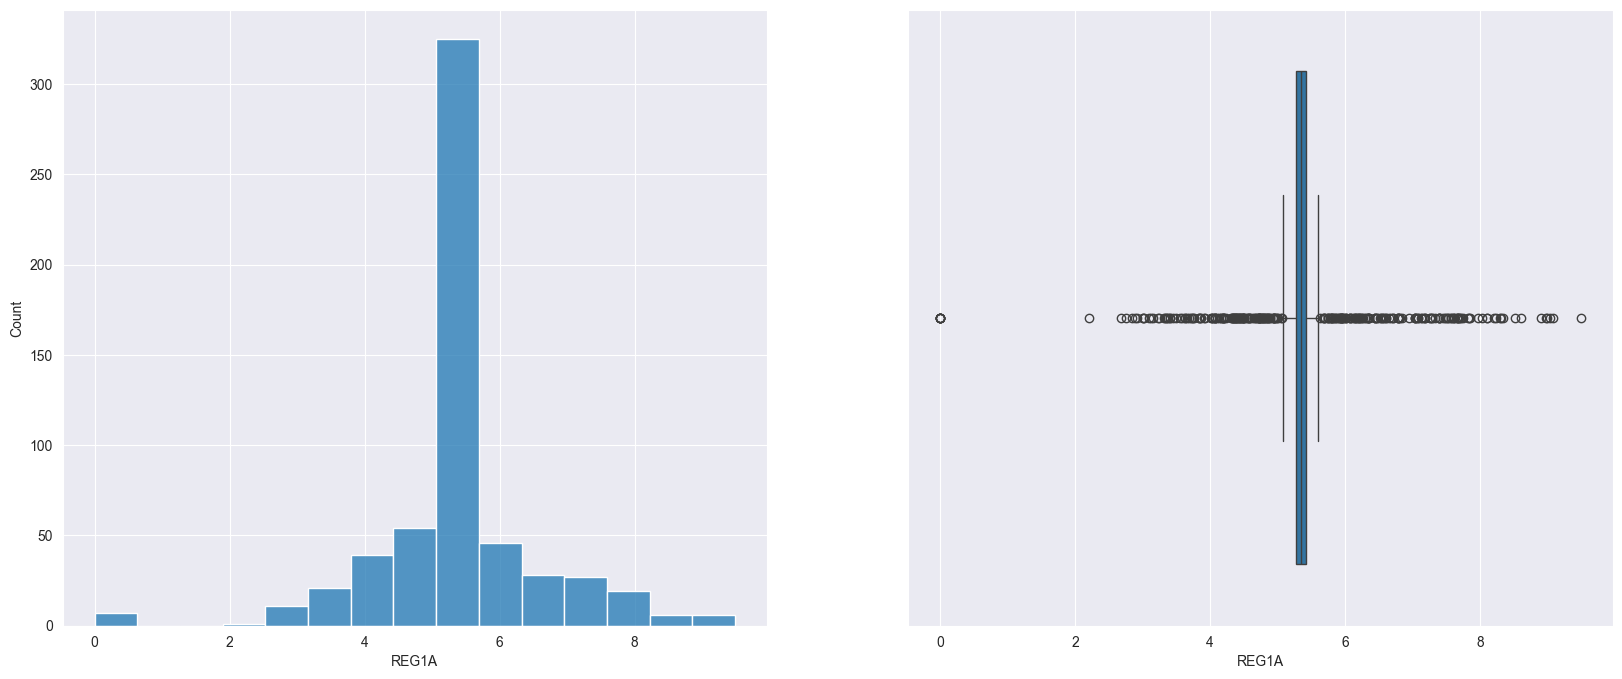

In [551]:
# A for loop to create histogram and boxplot plots for each of the numerical columns
for col in numerical_cols:
    print("Histogram plot and Box plot: ", col)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    sns.histplot(data[col], ax=ax1, bins = 15)
    sns.boxplot(x = data[col], ax = ax2)
    plt.show()

In [552]:
data.sample(10)

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_1?,is_male?
318,54,2,3.314186,1.281295,1.516517,2.762875,6.747864,4.958921,0,1
556,50,3,6.786717,0.644377,0.889630,3.944159,2.789920,7.385851,0,1
251,39,2,2.944439,0.589457,0.801123,2.096935,5.444150,3.664356,0,0
438,45,3,6.848005,0.388672,0.878322,5.688821,5.792788,7.038072,0,0
535,67,3,6.470490,0.595711,1.972692,6.660123,3.386601,7.518730,0,1
103,44,1,2.248129,0.166328,0.011858,1.146149,0.014016,2.682117,0,0
544,56,3,3.314186,0.469647,2.237386,4.822175,7.059636,5.344907,0,0
265,39,2,2.564949,0.166328,1.693856,3.422262,6.069383,6.446226,0,0
43,89,1,3.314186,0.497540,2.058836,4.354578,6.890146,5.344907,1,0
1,81,1,3.314186,0.679383,1.111063,4.558781,5.349430,5.435498,0,0


In [553]:
data.describe()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_1?,is_male?
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,59.079661,2.027119,3.651298,0.567379,1.054778,3.607996,4.979594,5.378932,0.437288,0.493220
std,13.109520,0.804873,1.778027,0.309551,0.843309,1.574352,2.226808,1.197012,0.496473,0.500378
min,26.000000,1.000000,0.000000,0.055009,0.000129,0.001104,0.005279,0.000000,0.000000,0.000000
25%,50.000000,1.000000,2.890372,0.317166,0.154584,2.464467,3.805664,5.279135,0.000000,0.000000
50%,60.000000,2.000000,3.314186,0.544554,0.974503,3.563973,5.563994,5.344907,0.000000,0.000000
75%,69.000000,3.000000,3.755317,0.760561,1.825361,4.818184,6.611675,5.416119,1.000000,1.000000
max,89.000000,3.000000,10.341775,1.632537,3.214479,7.247720,9.498920,9.488048,1.000000,1.000000


In [554]:
# The negative class (benign cancer)
data.diagnosis.replace(to_replace=[1, 2], value=0, inplace=True)
# The positive class (malignant cancer)
data.diagnosis.replace(to_replace=3, value=1, inplace=True)

C:\Users\meina\AppData\Local\Temp\ipykernel_13164\1368786935.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.diagnosis.replace(to_replace=[1, 2], value=0, inplace=True)
C:\Users\meina\AppData\Local\Temp\ipykernel_13164\1368786935.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [561]:
data['diagnosis']

0      0
1      0
2      0
3      0
4      0
      ..
585    1
586    1
587    1
588    1
589    1
Name: diagnosis, Length: 590, dtype: int64

In [562]:
features = data.drop("diagnosis", axis = 1) 
target = data.diagnosis

In [563]:
features

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_1?,is_male?
0,33,2.541602,1.041061,0.638279,3.988036,6.485066,7.141245,0,0
1,81,3.314186,0.679383,1.111063,4.558781,5.349430,5.435498,0,0
2,51,2.079442,0.576832,0.135919,4.638276,6.135870,5.344907,1,1
3,61,2.197225,0.531346,0.002801,4.120321,4.969466,5.344907,1,1
4,62,2.302585,0.194654,0.000859,4.197803,3.739763,5.344907,1,1
...,...,...,...,...,...,...,...,...,...
585,68,3.314186,0.418881,2.086691,5.057780,6.265640,5.344907,1,1
586,71,3.314186,0.620340,2.234435,2.885638,5.509174,5.344907,1,0
587,63,3.314186,0.862261,2.160412,5.672295,6.288390,5.344907,1,1
588,75,3.314186,0.847832,2.219940,5.332381,6.584132,5.344907,1,0


In [564]:
features.describe()

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_1?,is_male?
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,59.079661,3.651298,0.567379,1.054778,3.607996,4.979594,5.378932,0.437288,0.493220
std,13.109520,1.778027,0.309551,0.843309,1.574352,2.226808,1.197012,0.496473,0.500378
min,26.000000,0.000000,0.055009,0.000129,0.001104,0.005279,0.000000,0.000000,0.000000
25%,50.000000,2.890372,0.317166,0.154584,2.464467,3.805664,5.279135,0.000000,0.000000
50%,60.000000,3.314186,0.544554,0.974503,3.563973,5.563994,5.344907,0.000000,0.000000
75%,69.000000,3.755317,0.760561,1.825361,4.818184,6.611675,5.416119,1.000000,1.000000
max,89.000000,10.341775,1.632537,3.214479,7.247720,9.498920,9.488048,1.000000,1.000000


In [566]:
target

0      0
1      0
2      0
3      0
4      0
      ..
585    1
586    1
587    1
588    1
589    1
Name: diagnosis, Length: 590, dtype: int64

In [567]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=42)

In [568]:
mdl_LR = LogisticRegression(max_iter=30000)

In [569]:
mdl_LR.fit(X_train, y_train)

LogisticRegression(max_iter=30000)

In [570]:
y_pred_LR = mdl_LR.predict(X_test)

In [571]:
accuracy_score(y_test, y_pred_LR)

0.9096045197740112

<Axes: >

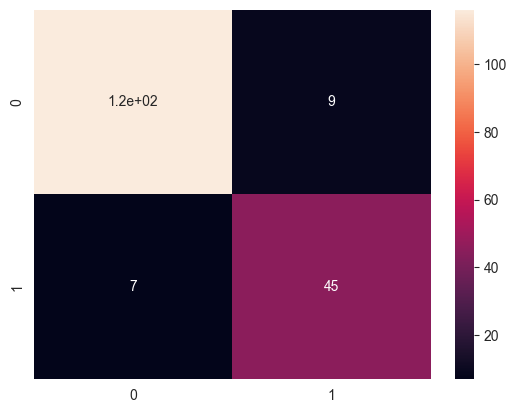

In [572]:
sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot = True)

In [573]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       125
           1       0.83      0.87      0.85        52

    accuracy                           0.91       177
   macro avg       0.89      0.90      0.89       177
weighted avg       0.91      0.91      0.91       177


In [574]:
mdl_DT = DecisionTreeClassifier()

In [575]:
mdl_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [576]:
y_pred_DT = mdl_DT.predict(X_test)

In [577]:
accuracy_score(y_test, y_pred_DT)

0.8531073446327684

<Axes: >

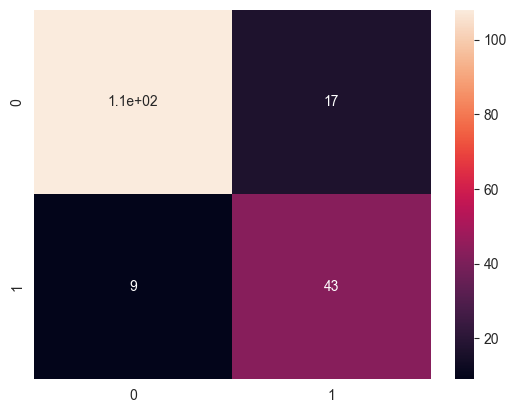

In [578]:
sns.heatmap(confusion_matrix(y_test, y_pred_DT), annot = True)

In [579]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       125
           1       0.72      0.83      0.77        52

    accuracy                           0.85       177
   macro avg       0.82      0.85      0.83       177
weighted avg       0.86      0.85      0.86       177
